# Proyecto 1 - Etapa 1

### Grupo 12
- **Estudiante 1** : Juan Sebastián Ardila López
- **Estudiante 2** : William Andrés Bayona Vergara
- **Estudiante 3** : Ana María Hernández Lasso

Requerimos la instalación pip install de:
- pip install pandas
- pip install numpy
- pip install matplotlib
- pip install num2words
- pip install nltk
- pip install spacy
- python -m spacy download es_core_news_sm
- pip install scikit-learn

# Etapa 1. Entendimiento de los Datos
Entenderemos el dataset con el que vamos a trabajar en el proyecto.

## 1.1 Exploración de datos

### Carga del dataset

Primero, cargaremos el dataset desde el archivo excel.

In [121]:
import pandas as pd
import numpy as np

#Cargamos el dataset de los datos de entrenamiento del proyecto
df_ods = pd.read_excel('./Datos_proyecto.xlsx')
#Queremos conocer el número de filas y columnas
filas, columnas = df_ods.shape

print("Cantidad de filas:", filas)
print("Cantidad de columnas:", columnas)

#Mostramos las primeras filas de las opiniones para saber cómo son los datos
print("Primeras filas del dataset:")
display(df_ods.head())

#Mostramos las últimas filas de las opiniones para saber cómo son los datos
print("Últimas filas del dataset:")
display(df_ods.tail())

#Mostramos la información del dataset
print("Información del dataset:")
display(df_ods.info())

Cantidad de filas: 2424
Cantidad de columnas: 2
Primeras filas del dataset:


,textos,labels
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4
1,Para los niños más pequeños (bebés y niños peq...,4
2,"Además, la formación de especialistas en medic...",3
3,En los países de la OCDE se tiende a pasar de ...,4
4,Este grupo se centró en las personas que padec...,3


Últimas filas del dataset:


,textos,labels
2419,La tutoría de carrera está diseñada para apoya...,4
2420,Fuente: Ministerio de Educación. Las Tasas Int...,4
2421,"Y desde 2010, el PNUD ha sido pionero en la pu...",1
2422,"Sin embargo, estas fallas del mercado implican...",3
2423,Aunque existen programas para convertirse espe...,4


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   textos  2424 non-null   object
 1   labels  2424 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 38.0+ KB


None

Conocemos que hay dos variables en el dataset:

- **textos**: contiene las opiniones ciudadanas en lenguaje natural, específicamente en idioma español. 

- **labels**: corresponde a la etiqueta numérica que clasifica cada texto en relación con un Objetivo de Desarrollo Sostenible (ODS).  


In [122]:
# Calculamos longitud de cada descripción
df_ods['textos_longitud'] = df_ods['textos'].str.len()

#Estadisticas de la longitud de las descripciones
df_ods_estadisticas = df_ods['textos_longitud'].describe()
df_ods_estadisticas

count    2424.000000
mean      683.223185
std       223.563695
min       303.000000
25%       513.000000
50%       647.000000
75%       809.250000
max      1492.000000
Name: textos_longitud, dtype: float64

In [123]:
#Veamos las estadisticas de los textos segun el ODS
textos_por_ods = df_ods.groupby('labels')['textos_longitud'].agg(['mean', 'min', 'max']).dropna()
textos_por_ods

,mean,min,max
labels,,,
1,680.588119,313,1492
3,680.991051,303,1486
4,686.468293,304,1452


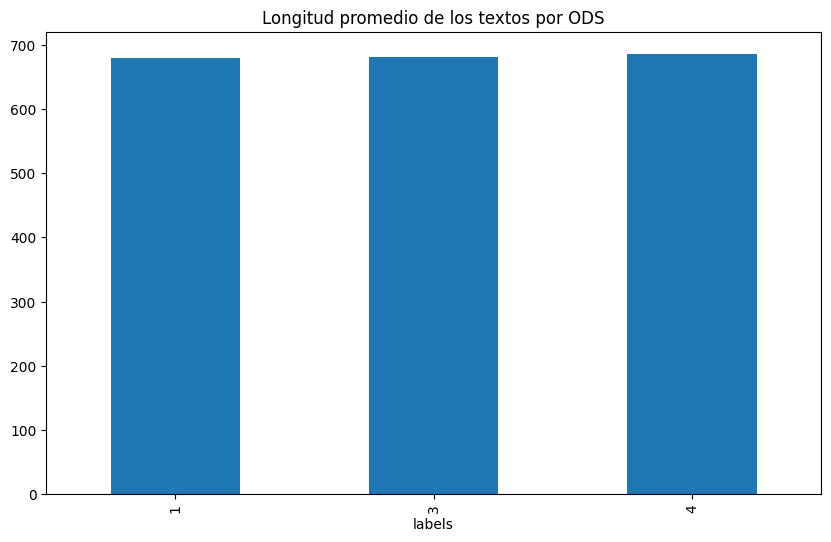

In [124]:
#Grafiquemos la longitud de los textos por ODS
import matplotlib.pyplot as plt

#Un diagrama de barras para la longitud promedio de los textos por ODS
fig, ax = plt.subplots(figsize=(10, 6))
textos_por_ods['mean'].plot(kind='bar', ax=ax)
ax.set_title('Longitud promedio de los textos por ODS')
plt.show()

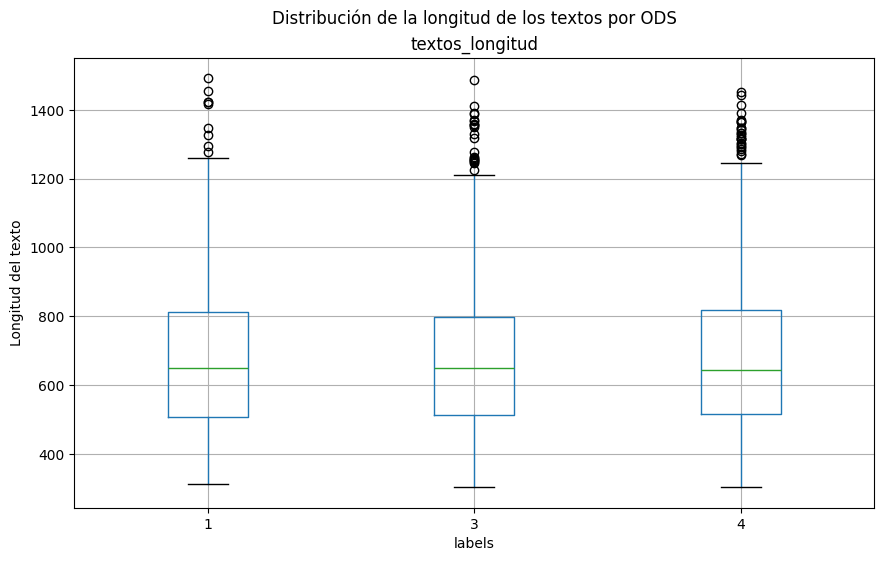

In [125]:
#Un diagrama de bigotes o boxplot para la longitud de los textos por ODS
fig, ax = plt.subplots(figsize=(10, 6))
df_ods.boxplot(column='textos_longitud', by='labels', ax=ax)
ax.set_ylabel('Longitud del texto')
fig.suptitle('Distribución de la longitud de los textos por ODS')

plt.show()

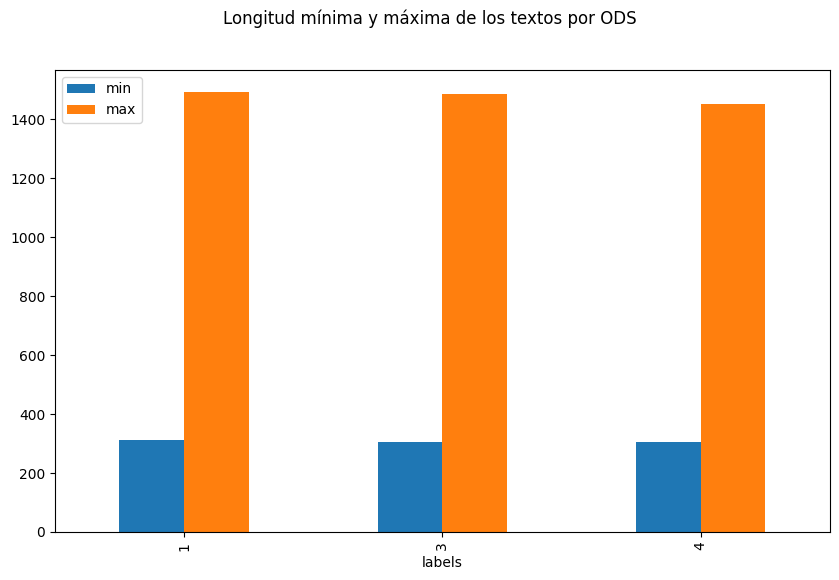

In [126]:
#Un diagrama para ver la longitud minima y maxima de los textos por ODS
fig, ax = plt.subplots(figsize=(10, 6))
textos_por_ods[['min', 'max']].plot(kind='bar', ax=ax)
fig.suptitle('Longitud mínima y máxima de los textos por ODS')
plt.show()

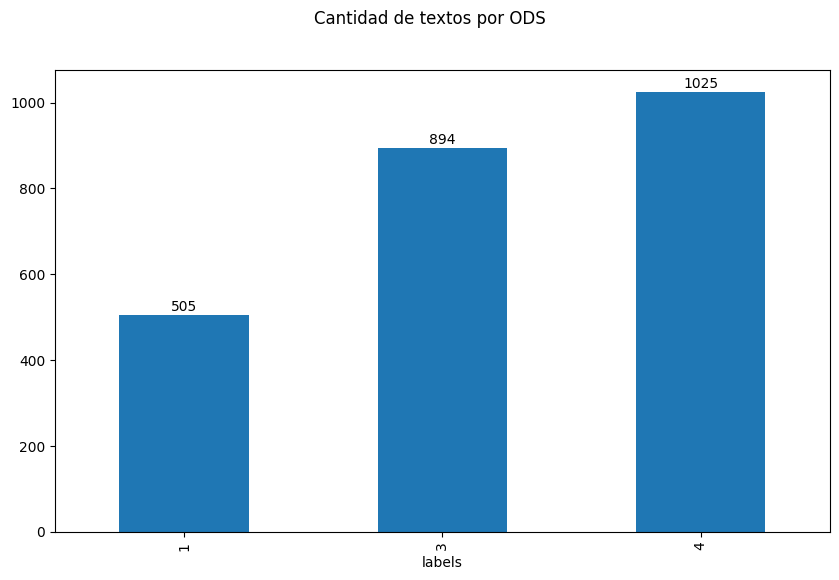

In [127]:
#Hagamos un diagrama de barras para ver la cantidad de textos por ODS
fig, ax = plt.subplots(figsize=(10, 6))
df_ods['labels'].value_counts().sort_index().plot(kind='bar', ax=ax)
fig.suptitle('Cantidad de textos por ODS')
#Pongamos el valor encima de cada barra
for indice_barra, valor in enumerate(df_ods['labels'].value_counts().sort_index()): 
    ax.text(indice_barra, valor + 3, str(valor), ha='center', va='bottom')
plt.show()

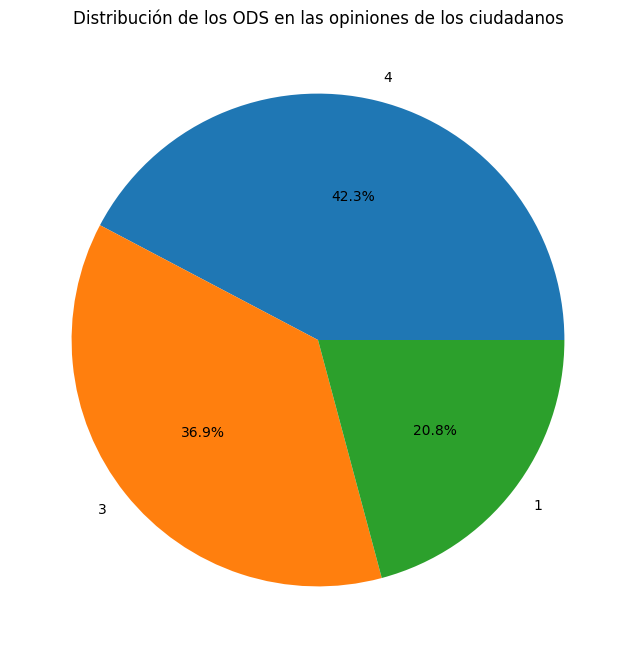

In [128]:
#Hagamos un pie chart para ver la distribución de los ODS (1,3,4)
ods_counts = df_ods['labels'].value_counts()
fig, ax = plt.subplots(figsize=(8, 8))
ods_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax)
ax.set_ylabel('')
ax.set_title('Distribución de los ODS en las opiniones de los ciudadanos')
plt.show()


**Perfilamiento de datos**

Se nos han compartido 2424 registros de opiniones ciudadanas sobre problemáticas sociales relacionadas con los Objetivos de Desarrollo Sostenible (ODS), etiquetados según 1 (Fin de la pobreza), 3 (Salud y bienestar) y 4 (Educación de calidad). 

El dataset está compuesto por dos columnas que describen las generalidades de una opinión ciudadana. Está la columna `textos`, la cual contiene la opinión de un ciudadano (en lenguaje natural, y además en el idioma español), claramente corresponde a texto. También encontramos la columna `labels`, la cual da una única clasificación a la opinión en cuestión, es una columna o variable numérica. 

La mayoría de las opiniones ciudadanas en el conjunto de datos pertenece al ODS 4, Educación de calidad (42.3%). Seguido, está ODS 3, Saluds y Bienestar (36.9%). Finalmente, el 20.8% de las opiniones pertenecen al ODS 1, Fin de la Pobreza. 

Conocemos que la longitud promedio de todas las opiniones sin distinción es de aproximadamente 683 caracteres, con un mínimo de 303 y un máximo de 1.492 caracteres. Ahora bien, la longitud promedio de las opiniones, clasificadas por ODS, es similar, siendo cercana a los 700 caracteres. 

Gracias al boxplot, sabemos que la mayoría de opiniones están entre los 500 y 800 caracteres, con algunos outliers o datos fuera de este rango, los cuales corresponden a texto más extensos, que van de 1200 caracteres hasta un poco más de 1400 caracteres. 

En general, los datos que tenemos tienen opiniones con extensión similar y hace posible dar un procesamiento coherente para ellas:
- La longitud de los textos se encuentra balanceada, mas no la cantidad de textos por ODS. 
- La cantidad de opiniones por ODS está desbalanceada. Claramente, hay muchas más opiniones de las ODS 4 y 3 en comparación con la ODS 1. De hecho, la ODS 1 tiene aproximadamente la mitad de datos que la ODS 4. Para la 1 hay 505 opiniones; para la 3, 894; para la 4, 1025. Esto debe tenerse en cuenta al revisar el desempeño de los modelos.

## 1.2 Análisis de calidad de los datos

### Completitud: Revisión de nulos y cadenas vacías

In [129]:
df_ods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   textos           2424 non-null   object
 1   labels           2424 non-null   int64 
 2   textos_longitud  2424 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 56.9+ KB


In [130]:
# Verificamos nulos y vacíos en la columna textos
num_nulls = df_ods['textos'].isnull().sum()
num_empty = (df_ods['textos'].str.strip() == '').sum()

print("Número de valores nulos en 'textos':", num_nulls)
print("Número de cadenas vacías en 'textos':", num_empty)

Número de valores nulos en 'textos': 0
Número de cadenas vacías en 'textos': 0


No hay datos nulos, ni cadenas vacías en los datos. Tanto la columna textos como la columna de etiquetas o labels están completas. Ambas tienen 2424 datos. 

### Unicidad: Revision de duplicados: totales y parciales

In [131]:
#Veamos los duplicados totales
num_duplicados = df_ods.duplicated().sum()
print("Número de filas duplicadas en el dataset:", num_duplicados)

Número de filas duplicadas en el dataset: 0


In [132]:
#Agrupamos por texto y contamos cuántos labels distintos tiene
conflictos = df_ods.groupby('textos')['labels'].nunique()

#Nos quedamos solo con los que tienen más de 1 etiqueta distinta
conflictos = conflictos[conflictos > 1]

print("Número de textos con varias etiquetas:", conflictos.shape[0])


Número de textos con varias etiquetas: 0


Verificamos que no existen filas duplicadas ni duplicados parciales, que en este caso son textos repetidos con etiquetas distintas.

### Consistencia: Confirmar que los formatos de las columnas son acordes a lo esperado

In [133]:
#Revisamos que todos los registros en la columna 'textos' sean string
tipos_textos = df_ods['textos'].apply(type).unique()
print("Tipos de datos en 'textos':", tipos_textos)

#Revisamos que todos los registros en  la columna'labels' sean numéricos
tipos_labels = df_ods['labels'].apply(type).unique()
print("Tipos de datos en 'labels':", tipos_labels)

Tipos de datos en 'textos': [<class 'str'>]
Tipos de datos en 'labels': [<class 'int'>]


En efecto, los tipos de datos son los esperados para cada columna.

### Validez: Confirmar que los valores estén dentro de rangos lógicos para el contexto del problema

En nuestro caso, vamos a revisar que los tipos de ODS sean 1, 3 o 4. Ningún otro tipo.

In [134]:
valores_unicos = df_ods['labels'].unique()
print("Valores únicos en labels:", valores_unicos)

Valores únicos en labels: [4 3 1]


En efecto, los únicos tipos de ODS en los datos que recibimos son 1, 3 y 4.

El dataset de entrenamiento es de buena calidad, ya que no tiene valores nulos, ni duplicados totales o parciales, los tipos de datos son correctos y los valores se encuentran dentro de los rangos esperados.

## Enfoque analítico

Para el proyecto de ODS y opiniones ciudadanas, hemos sido contratados para construir un modelo de aprendizaje automático que pueda clasificar automáticamente las opiniones de la ciudadanía en relación con los Objetivos de Desarrollo Sostenible (ODS) 1, 3 y 4. En ese contexto, y una vez entendidos los datos, identificamos:

- **Tipo de analítica**: Predictiva, porque queremos saber qué va a pasar, en este caso: ¿A qué ODS (1, 3 o 4) va a pertenecer la nueva opinión de un cuidadano?

- **Tipo de aprendizaje**: Supervisado, debido a que contamos con un dataset etiquetado. Cada registro que tenemos incluye el texto de la opinión y la etiqueta que indica a qué ODS está asociada (1, 3 o 4), lo que permite entrenar el modelo con ejemplos donde conocemos la respuesta. Siempre queremos predecir el tipo de ODS: 1-ODS, 3-ODS, 4-ODS de la opinión.

- **Tipo de tarea supervisada**: Clasificación, ya que la variable objetivo es el tipo de ODS y puede tomar los valores 1, 3 o 4. Toma el valor 1 para ODS de Fin de la Pobreza, 3 para Salud y Bienestar y 4 para Educación de Calidad. Además, contamos con un conjunto de entrenamiento de datos etiquetados (qué clase corresponde a cada registro). Es importante notar que, en este caso, los números son solo etiquetas de categorías, no magnitudes continuas.

# Etapa 2. Procesamiento de texto: tokenización y limpieza de palabras

Comencemos haciendo una función para eliminar ruido en los registros de los textos:
1. Pasemos todo a minúsculas
2. Eliminamos signos de puntuación (no incluye tildes), pero si puntos, comas, comillas, entre otros.
3. Reemplazamos números por su equivalente en palabras


In [135]:
import nltk
import string
from nltk.corpus import stopwords
from num2words import num2words

#Esto se hara cuando el texto ya este tokenizado
def limpiar_texto(texto_tokenizado):
    texto_limpio_tokenizado = []
    for palabra in texto_tokenizado:
        # Pasar a minúsculas
        palabra = palabra.lower()
        # Eliminar signos de puntuación
        palabra = palabra.translate(str.maketrans('', '', string.punctuation))
        # Reemplazar números por su representación en palabras
        if palabra.isdigit():
            palabra = num2words(palabra, lang='es')
        # Agregar si no está vacía
        if palabra:
            texto_limpio_tokenizado.append(palabra)
    return texto_limpio_tokenizado

Para procesar las opiniones de los ciudadanos, hay que hacer tokenización, lematización y normalización. Recodermos un poco estos conceptos para tener claro lo que vamos a realizar:

**Tokenización:** dividimos las frases o las oraciones en tokens (palabras)

**Lematización:** llevamos cada palabra o token a su base gramatical (comimos -> comer)

**Normalización:** aplicamos la función que reduce ruido en los tokens para poder unificar el texto

Hacemos el proceso de tokenización

In [136]:
#Tokenizamos el texto (cada registro de textos en el dataframe)
def tokenizar_columna(df, columna_texto, nueva_columna):
    tokens_col = []
    #Hacemos un split por espacio para tokenizar
    for texto in df[columna_texto]:
        tokens_col.append(str(texto).split())
    df[nueva_columna] = tokens_col
    return df

df_ods = tokenizar_columna(df_ods, 'textos', 'tokens')

#Veamos cómo quedaron los tokens
df_ods[['textos', 'tokens']].head()

,textos,tokens
0,"""Aprendizaje"" y ""educación"" se consideran sinó...","[""Aprendizaje"", y, ""educación"", se, consideran..."
1,Para los niños más pequeños (bebés y niños peq...,"[Para, los, niños, más, pequeños, (bebés, y, n..."
2,"Además, la formación de especialistas en medic...","[Además,, la, formación, de, especialistas, en..."
3,En los países de la OCDE se tiende a pasar de ...,"[En, los, países, de, la, OCDE, se, tiende, a,..."
4,Este grupo se centró en las personas que padec...,"[Este, grupo, se, centró, en, las, personas, q..."


Una vez tenemos los tokens podemos hacer una visualización interesante: La cantidad de palabras promedio por ODS

Cantidad promedio de palabras por ODS:
ODS 1: 110.37 palabras
ODS 3: 108.03 palabras
ODS 4: 106.63 palabras


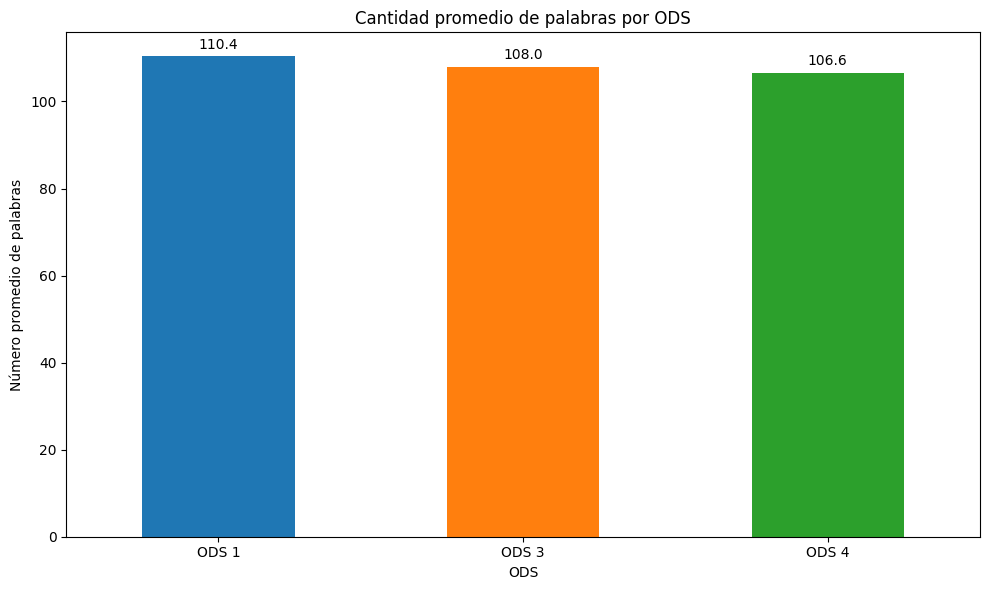

In [137]:
# Calculamos la cantidad promedio de palabras por ODS
palabras_promedio_por_ods = df_ods.groupby('labels')['tokens'].apply(lambda x: x.apply(len).mean()) #TODO REVISAR

print("Cantidad promedio de palabras por ODS:")
for ods, promedio in palabras_promedio_por_ods.items():
    print(f"ODS {ods}: {promedio:.2f} palabras")

# Creamos un gráfico de barras para visualizar
fig, ax = plt.subplots(figsize=(10, 6))
palabras_promedio_por_ods.plot(kind='bar', ax=ax, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax.set_title('Cantidad promedio de palabras por ODS')
ax.set_xlabel('ODS')
ax.set_ylabel('Número promedio de palabras')
ax.set_xticklabels([f'ODS {int(x)}' for x in palabras_promedio_por_ods.index], rotation=0)

# Añadimos los valores encima de cada barra
for i, valor in enumerate(palabras_promedio_por_ods.values):
    ax.text(i, valor + 1, f'{valor:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Eliminamos ruido para una lematización adecuada

In [138]:
#Eliminamos ruido para poder hacer lematización después
#Debemos hacerlo, o tokens como '"aprendizaje"' no se lematizarán bien, pues tienen comillas o signos de puntuación y 
#spacy puede no reconocer bien el token
df_ods["tokens_limpios"] = df_ods["tokens"].apply(limpiar_texto)

#Veamos cómo quedaron los tokens limpios
df_ods[['tokens', 'tokens_limpios']].head()

,tokens,tokens_limpios
0,"[""Aprendizaje"", y, ""educación"", se, consideran...","[aprendizaje, y, educación, se, consideran, si..."
1,"[Para, los, niños, más, pequeños, (bebés, y, n...","[para, los, niños, más, pequeños, bebés, y, ni..."
2,"[Además,, la, formación, de, especialistas, en...","[además, la, formación, de, especialistas, en,..."
3,"[En, los, países, de, la, OCDE, se, tiende, a,...","[en, los, países, de, la, ocde, se, tiende, a,..."
4,"[Este, grupo, se, centró, en, las, personas, q...","[este, grupo, se, centró, en, las, personas, q..."


Hacemos el proceso de lematización

In [139]:
#Lematizamos los tokens

import spacy

#Cargar el modelo de spaCy para español
nlp = spacy.load("es_core_news_sm")

def lematizar_los_tokens(df, columna_tokens, nueva_columna):
    lemas_col = []
    for lista_tokens in df[columna_tokens]:
        #Creamos un doc de spaCy a partir de los tokens, pues asi spacy hace la lematización
        doc = nlp(" ".join(lista_tokens))
        lemas = []
        #para cada palabra en el doc (en la frase)
        for token in doc:
            if not token.is_space:
                lemas.append(token.lemma_)
        #token.lemma_ devuelve la raíz de cada palabra
        #se hace una lista de lemas con las palabra ya lematizadas que no son espacios
        lemas = [tok.lemma_ for tok in doc if not tok.is_space]
        lemas_col.append(lemas)
    df[nueva_columna] = lemas_col
    return df

#Aplicamos la lematización
df_ods = lematizar_los_tokens(df_ods, "tokens_limpios", "tokens_lematizados")

#Veamos cómo quedaron los tokens lematizados
display(df_ods[["tokens_limpios", "tokens_lematizados"]].head())


,tokens_limpios,tokens_lematizados
0,"[aprendizaje, y, educación, se, consideran, si...","[aprendizaje, y, educación, él, considerar, si..."
1,"[para, los, niños, más, pequeños, bebés, y, ni...","[para, el, niño, más, pequeño, bebé, y, niño, ..."
2,"[además, la, formación, de, especialistas, en,...","[además, el, formación, de, especialista, en, ..."
3,"[en, los, países, de, la, ocde, se, tiende, a,...","[en, el, país, de, el, ocde, él, tender, a, pa..."
4,"[este, grupo, se, centró, en, las, personas, q...","[este, grupo, él, centrar, en, el, persona, qu..."


Hacemos una normalización final con el fin de dejar el texto en un mismo formato:
1. Eliminamos stopwords
2. Quitamos las tildes, que no estaban incluidas en la vez que quitamos los signos de puntuación
3. Nos aseguramos de no dejar palabras vacías

In [140]:
import string, unicodedata 

#Descargamos las stopwords y las definimos en español
#Recordar super importante: las stopwords son palabras que son usuales en un idioma, en este caso el español, pero que no aportan casi valor para analizar el texto
#Por ejemplo: el, un, para, por, y
nltk.download("stopwords")
stop_words = set(stopwords.words("spanish"))

#Hagamos una normalización final para eliminar cualquier ruido que haya quedado

#Función para quitar tildes
def quitar_tildes(s: str) -> str:
    return ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')

def normalizar_texto(texto_tokenizado):
    texto_limpio_tokenizado = []
    for palabra in texto_tokenizado:
        #Quitamos las tildes
        if 'á' in palabra or'é' in palabra or 'í' in palabra or'ó' in palabra or'ú' in palabra or 'ü' in palabra:
            palabra = quitar_tildes(palabra)
        #Eliminamos stopwords y palabras vacías
        if palabra and palabra not in stop_words:
            texto_limpio_tokenizado.append(palabra)
    return texto_limpio_tokenizado

#Aplicamos la normalización final
df_ods["tokens_finales"] = df_ods["tokens_lematizados"].apply(normalizar_texto)

#Veamos cómo quedaron los tokens finales
df_ods[["tokens_lematizados", "tokens_finales"]].head()



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tokens_lematizados,tokens_finales
0,"[aprendizaje, y, educación, él, considerar, si...","[aprendizaje, educacion, considerar, sinonir, ..."
1,"[para, el, niño, más, pequeño, bebé, y, niño, ...","[niño, mas, pequeño, bebe, niño, pequeño, capa..."
2,"[además, el, formación, de, especialista, en, ...","[ademas, formacion, especialista, medicina, ge..."
3,"[en, el, país, de, el, ocde, él, tender, a, pa...","[pais, ocde, tender, pasar, curso, obligatorio..."
4,"[este, grupo, él, centrar, en, el, persona, qu...","[grupo, centrar, persona, padecer, trastorno, ..."


Continuamos con el proceso de vectorización, que es el último paso en el preprocesamiento de textos. Este permite representar las palabras de una forma numérica, de forma que puedan ser procesados con los distintos modelos, pues no las comprenden como texto.

Vectorizar, en nuestro caso, lo podemos pensar como:
- Construir una matriz texto-término (cada palabra es un término).
- Usar TF-IDF, que nos dice que tan relevante es la palabra para describir ese texto (opinión).

TF-IDF:
Da un puntaje alto a palabras que:
- Palabras que aparecen mucho en un texto concreto (TF alto)
- Pero que son poco comunes en los demás textos (IDF alto)

In [141]:
#Preparamos los documentos como strings, unimos los tokens finales dejando un espacio entre ellos
#Todos los documentos se llaman corpus
corpus = df_ods["tokens_finales"].apply(lambda toks: " ".join(toks)).fillna("")

corpus

0       aprendizaje educacion considerar sinonir escol...
1       niño mas pequeño bebe niño pequeño capacitacio...
2       ademas formacion especialista medicina general...
3       pais ocde tender pasar curso obligatorio optat...
4       grupo centrar persona padecer trastorno mental...
                              ...                        
2419    tutoer carrera diseñar apoyar estudiante conse...
2420    fuente ministerio educacion tasa interno retor...
2421    dos mil diez pnud haber ser pionero puesta mar...
2422    embargo falla mercado implicar competencia sol...
2423    aunque existir programa convertir el especific...
Name: tokens_finales, Length: 2424, dtype: object

Vamos a crear el vectorizador para TF-IDF teniendo en cuenta lo siguiente:
1. No vamos a agregar preprocesamiento de más por parte del vectorizador: ya las palabras están en minúscula y ya se limpiaron los datos

2. Ignoraremos las palabras que aparecen en menos de dos documentos, ya que su ocurrencia es muy extraña y no ayuda a realmente distinguir un tipo de ods. De hecho, hasta podrían ser errores ortográficos.

3. Ignoraremos las palabras que aparecen en más del 90% de los documentos, ya que al ser demasiado comunes no aportan a distinguir un tipo de ods, por ejemplo palabras como "problema" o "ods" no serían útiles, pero podrían repetirse bastante bajo este contexto.

4. Solo vamos a considerar tokens con al menos dos letras, que no ayudan a hacer distinción. Dejamos dos, porque las palabras no o sí pueden ser útiles al distinguir opiniones.

5. No vamos a fijarnos en números (como años: 2006, 2007) para distinguir una opinión, ya que no resulta útil para clasificar. Estos pudieron no haber estado puros (2006año, en2007) y por ello pudieron haber estado presentes luego del filtrado. De todas formas, no los consideraremos.

In [142]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Creamos el vectorizador TF-IDF
tfidf = TfidfVectorizer(
    preprocessor=None, #No aplicamos más preprocesamiento, ya limpiamos antes
    lowercase=False, #No convertimos a minúsculas, ya lo hicimos
    min_df=2, #Ignoramos palabras que aparecen en menos de 2 documentos
    max_df=0.90, #Ignoramos palabras que aparecen en más del 90% de los documentos (demasiado comunes, como si fuera "ods", no aporta)
    token_pattern=r"(?u)\b[^\W\d_]{2,}\b" #Solo consideramos tokens con al menos 2 letras (ignoramos números y palabras de una letra)
)

X_tfidf = tfidf.fit_transform(corpus) #Esto crea la matriz TF-IDF de opinion-terminos


In [143]:
#Obtenemos todas las palabras únicas que el vectorizador vio en el corpus
terminos = tfidf.get_feature_names_out()

#Veamos el tamaño del vocabulario
print("Tamaño del total de términos:", len(terminos))

#Veamos una parte de la matriz en forma de DataFrame para saber si la vectorización se hizo bien
#Veamos las primeras 5 filas
df_preview = pd.DataFrame( X_tfidf[:5].toarray(),  columns=terminos)
#Veamos las primeras 10 columnas, no todas las palabras
df_preview.iloc[:, :10]


Tamaño del total de términos: 4905


,abajo,abandonar,abandono,abarcar,abierto,abitur,abogar,abolir,abordado,abordaje
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.147916,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [144]:
import numpy as np

def top_terminos(doc_id, top):
    row = X_tfidf[doc_id].toarray().ravel()
    indices = np.argsort(-row)[:top]
    return [(terminos[i], float(row[i])) for i in indices if row[i] > 0]

#Mosrtremos los términos más importantes del documento 0 (su top 10) y sus puntos ITF-IDF
print(top_terminos(0, 10)) 


[('organizacion', 0.35425636768507385), ('considerar', 0.30096281418967274), ('editorial', 0.29824942119612274), ('auxiliar', 0.27571688503055786), ('extension', 0.2540145699642186), ('inadecuado', 0.23768880251932986), ('escolarizacion', 0.22781911912280323), ('establecido', 0.21580050884624385), ('formal', 0.2145221698350767), ('volver', 0.21328317063825086)]


# Etapa 3. Modelado
Se propondrán diferentes modelos para cumplir con la clasificación de los textos

### 3.1. Estudiante 3 - Ana María Hernández Lasso: Modelo de Regresión Logística

**¿Qué es el modelo de regresión logística?**

La regresión logística es un modelo de aprendizaje supervisado que se utiliza para resolver problemas de clasificación, que es justo nuestro caso. Mientras que en la regresión lineal se busca predecir valores continuos, la regresión logística predice la probabilidad de pertenencia a una clase o categoría. 

De hecho, la regresión lineal justamente regresa un valor de los números reales, mientras que la regresión logística, al hablar de probabilidades, toma valores entre 0 y 1 teniendo en cuenta las variables explicativas.

En su forma más simple, la regresión logística se usa para clasificar entre dos categorías (binaria, como sí o no), pero puede extenderse a más clases, como las de la ODS: 1, 3 o 4. Esto lo hacemos con la función softmax, que ayuda a dar probabilidades a que una opinión pertenezca a cada una de las categorías y se queda con la más alta como predicción.

**Justificación de la elección**

He elegido un modelo de Regresión Logística por las siguientes razones:

1. La regresión logística justamente está destinada a predecir probabilidades de pertenecer a una clase, que es justo lo que necesitamos para poder conocer a qué categoría de ODS puede pertecener una noticia.

2. Funciona bien con alta dimensionalidad: 

- La dimensionalidad es el número de variables explicativas para cada dato. En este caso, como estamos trabajando con texto y para hacer vectorización aplicamos TF-IDF, cada palabra que sea única del vocabulario de todos los documentos (del corpus) se convirtió en una variable. Como vimos, tenemos 4905 términos, por lo que cada opinión ciudadana quedó representada como un vector de 4905 dimensiones. 

- El modelo de regresión logística funciona bien con alta dimensionalidad, de hecho es una opción que se acostumbra considerar al manejar TF-IDF, y puede aplicarse una técnica llamada regularización para evitar que el modelo "memorice" demasiado los datos de entrenamiento y no pueda generalizar la clasificación a nuevos casos, en caso de ser necesario (Van Otten, 2023). Así, hay solución para ese escenario. 

3. En la regresión logística, para cada palabra del vocabulario se asigna un coeficiente que dice cuánto la presencia de esa palabra influye en la probabilidad de que el texto pertenezca a una categoría (ODS 1, 3 o 4). Por ejemplo, el coeficiente de "escuela" podría ser alto y positivo para el tipo de ODS 4, que es sobre Educación de Calidad, lo que sube la probabilidad de que el documento sea clasificado en ese tipo. Esto es útil para nuestro caso, ya que cada ODS se puede relacionar con distintos términos clave (por ejemplo, pobreza con ODS 1, hospital con ODS 3, escuela con ODS 4), lo que facilita interpretar por qué el modelo asigna una opinión a determinada categoría. Además, este modelo permite ver los coeficientes y ver qué palabras tienen mayor coeficiente para cada clase. 

4. Este modelo puede manejar el desbalance de clases, pues recordemos que la ODS 1 tiene menos registros en comparación con los otros tipos. Esto es importante porque, si no se corrige, el modelo tendería a favorecer siempre a las clases con mayor cantidad de registros (ODS 3 y 4), clasificando mal la que tiene menos filas, y llegando a generar un sesgo, pues no se entrenó con los suficientes datos. La regresión logística lo puede manejar sin necesidad de producir opiniones genéricas para la ODS-1, esto lo explicaré a continuación:


**¿Cómo se maneja el desbalance de la cantidad de opiniones por ODS?**

El desbalance se usa con el parámetro `class_weight="balanced"` en la implementación de la regresión logística. Funciona así:

- El modelo ajusta el peso de cada clase, es decir, que las clases con menos registros “valen” más durante el entrenamiento, por eso un error en ellas “pesa” más; mientras que las clases con más registros “valen” menos, y sus errores cuentan menos.

- Por ejemplo, si durante la etapa de entreno el modelo se equivoca con una opinión que realmente era de ODS 1, que no tiene tanto registros, y la clasifica en otra categoría de ODS, ese error tiene un peso mayor que si el error fuera en una opinión de ODS 4. Esto permite que el modelo aprenda a prestar más atención a la clase con menos ejemplos y balancee su aprendizaje. De alguna manera, hace que el peso de los errores (catalogar mal opiniones) sea equitativo según la cantidad de registros por cada tipo. 

- Básicamente, en el entrenamiento un error en ODS de tipo 1 podría contarse como “2 puntos” y uno en ODS de tipo 4 como “1 punto”, lo que se equilibra teniendo en cuenta la cantidad de registros por ODS, y así el modelo va aprendiendo.

- OJO: Esto solo pasa en la etapa de entrenamiento. Durante etapas como test o en su uso real, el modelo ya aprendió con esos ajustes y ahora trata a todos los errores por igual. Solo que gracias al balance que hizo en el entrenamiento, el modelo predice mejor clases minoritarias.

**Fuentes**
- DATAtab - Español. (2023, octubre). Regresión Logística [Fácilmente explicable] [Video]. YouTube. https://www.youtube.com/watch?v=mjbWGx6Xgvg
- Van Otten, N. (2023, febrero 22). How to implement logistic regression text classification in Python with Scikit-learn and PyTorch. Spot Intelligence. https://spotintelligence.com/2023/02/22/logistic-regression-text-classification-python

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#La variable objetivo, en nuesto caso, la columna 'labels'
variable_objetivo = df_ods["labels"]


#x_train es la matriz donde cada fila es un documento y cada columna un término, y el valor es el peso TF-IDF
#es decir, x_train son los documentos representados como vector con la matriz TF-IDF para entrenar el modelo
#x_test es igual pero para testear el modelo
#y_train es la variable objetivo (labels) con las etiquetas de cada documento para entrenar el modelo
#y_test es igual pero para testear el modelo

#train_test_split divide los datos en conjuntos de entrenamiento y prueba donde el entrenamiento es el 80% y la prueba el 20% (0.8 y 0.2)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, variable_objetivo, test_size=0.2, random_state=42, stratify=variable_objetivo)

#Acá se esta creando el modelo de regresión logística 
modelo_regresion_logistica = LogisticRegression(
    max_iter=2000,    #El modelo tiene que buscar coeficientes para las palabras (por ejemplo, "escuel" con coeficiente alto para ODS 4), 
    #para eso el modelo tiene que probar valores, calcular errores, ajustar y volver a intentar, 
    #y eso se repite muchas veces (es iterativo el proceso de encontrar los coeficientes de los términos)
    #Este parametro hace que el modelo haga máximo 2000 iteraciones para encontrar esos coeficientes de todos los terminos (lo hace para todos a la vez)
    #Basicamente estas 2000 iteraciones no son por término, sino para todo el modelo a la vez (ajusta todos los coeficientes en cada paso

    class_weight="balanced", #Este es el parametro que maneja el desbalance de clases (por la cantidad desigual de opiniones por ODS)
    solver="lbfgs" #Este es un algoritmo que usa el modelo para manejar los coeficientes de los términos
)

#Antes también se ponía el parametro: multi_class="ovr" 
#Como dije, la regresión logística es binaria originalmente (sí o no) 
#y en este caso trabajamos multiclase, este parámetro hace que se adapte a ello
#Ahora scikit-learn lo detecta solo y no es necesario ponerlo, pero por debajo sabe que es multiclase

#Ahora si, vamos a entrenar el modelo con los datos de entrenamiento
modelo_regresion_logistica.fit(X_train, y_train)

#Aqui predecimos los ODS de los datos de prueba, no de entrenamiento 
variable_objetivo_pred = modelo_regresion_logistica.predict(X_test)

#Veamos como quedaron algunas de las predicciones
print(variable_objetivo_pred[:10])


[3 3 4 1 4 4 4 4 3 1]


Ahora veamos las métricas del modelo de Regresión Logística

In [146]:
#Ahora veamos las métricas del modelo

#Para ver cómo anda el modelo, veamos las métricas en el conjunto de entrenamiento y en el de prueba
print("Resultados del modelo de Regresión Logística en el conjunto de entrenamiento:")
print(classification_report(y_train, modelo_regresion_logistica.predict(X_train), digits=3))


print("Resultados del modelo de Regresión Logística en el conjunto de prueba:")
print(classification_report(y_test, variable_objetivo_pred,  digits=3))

Resultados del modelo de Regresión Logística en el conjunto de entrenamiento:
              precision    recall  f1-score   support

           1      0.990     0.998     0.994       404
           3      0.997     0.992     0.994       715
           4      0.995     0.996     0.996       820

    accuracy                          0.995      1939
   macro avg      0.994     0.995     0.995      1939
weighted avg      0.995     0.995     0.995      1939

Resultados del modelo de Regresión Logística en el conjunto de prueba:
              precision    recall  f1-score   support

           1      0.960     0.950     0.955       101
           3      0.967     0.972     0.969       179
           4      0.980     0.980     0.980       205

    accuracy                          0.971       485
   macro avg      0.969     0.968     0.968       485
weighted avg      0.971     0.971     0.971       485



**Interpretación de los resultados**

**1. Precisión**
- Hace referencia a, de todas las veces que el modelo dijo que una opinión era de la ODS X, ¿cuántas veces realmente sí pertenecía a esa ODS?, en otras palabras, ¿cuántas veces sí tenía la razón?
- Es como revisar ¿qué tan confiable es el modelo cuando afirma que una opinión es ODS 1/3/4?

- De todas las veces que el modelo clasificó una opinión como ODS 1, el 96% sí era ODS 1.
- De todas las veces que el modelo clasificó una opinión como ODS 3, el 96.7% sí era ODS 3.
- De todas las veces que el modelo clasificó una opinión como ODS 4, el 98% sí era ODS 4.

- Ninguna de ellas da 100% o 99.99% por lo que el modelo no hizo overfitting, no se aprendió los casos del entrenamiento.

**2. recall**
- Hace referencia a, de todas las veces que una opinión realmente pertenecía a cierta, ¿cuántas veces el modelo sí la identificó bien?
- Es como revisar ¿qué tanto el modelo no dejo pasar ninguna ODS 1/3/4?

- De todas las opiniones que realmente eran ODS 1, el modelo identificó correctamente el 95%.
- De todas las opiniones que realmente eran ODS 3, el modelo identificó correctamente el 97.2%.
- De todas las opiniones que realmente eran ODS 4, el modelo identificó correctamente el 98%.

- No hay sesgos sobre ninguna categoría, tiene un recall similar para las tres, aun teniendo en cuenta que en los datos de prueba tenía menos registros de la ODS 1, por lo que el balanceo funcionó efectivamente.

**3. f1-score**
- En una métrica combina precisión y recall

- Por ejemplo, precisión alta + recall bajo: el modelo casi nunca se equivoca cuando predice la clase, pero deja pasar muchos casos que sí eran de esa clase.
- Por ejemplo, Precisión baja + recall alto: el modelo encuentra casi todas las opiniones reales de esa clase, pero también se equivoca mucho y mete muchas opiniones que no eran de ese tipo.
- Por ejemplo, precisión alta + recall alto: el modelo predice bien y además no se pierde casi ningún caso.

- Para nuestro caso sucede que el modelo predice bien y además no se pierde casi ningún caso para las tres ODS. Para ODS 1, el f1-score es 95.5%.Para ODS 3, el f1-score es 96.9%. Para ODS 4, el f1-score es 98%.

**4. ¿Hay overfitting?**

No, pues las métricas del conjunto de entrenamiento y del conjunto de prueba no tienen diferencias significativas: 

- Si hubiese overfitting, pasaría que el modelo mostraría un rendimiento muy alto en entrenamiento (muy cerca al 100%), pero al evaluarse en el conjunto de prueba ese rendimiento caería de manera considerable (por ejemplo, podría pasar de 100% o 99% a 80%). 

- En este caso, aunque el modelo obtiene valores un poco mayores en entrenamiento, en el conjunto de prueba sigue alcanzando métricas muy altas e incluso similares a las del entrenamiento. Esto indica que el modelo generaliza bien y no hay overfitting.

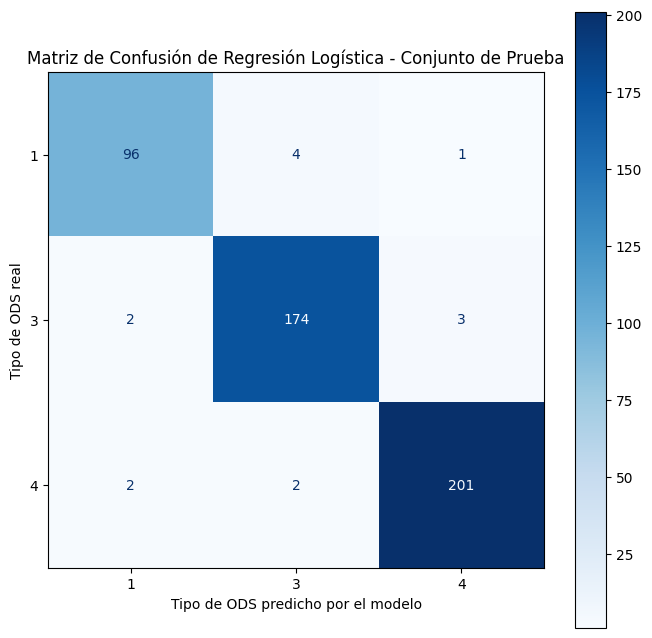

In [147]:
#Y ahora veamos la matriz de confusión
fig, ax = plt.subplots(figsize=(8, 8))
matriz_de_confusion = ConfusionMatrixDisplay.from_estimator(modelo_regresion_logistica, X_test, y_test, cmap="Blues", ax = ax)
ax.set_ylabel("Tipo de ODS real")
ax.set_xlabel("Tipo de ODS predicho por el modelo")
plt.title("Matriz de Confusión de Regresión Logística - Conjunto de Prueba")

plt.show()

**Interpretación de la matriz de confusión**
- Primero, hay que tener muy claro que la matriz de confusión es una tabla que compara las predicciones que hizo modelo con los tipos de ODS reales.
- Para la ODS 1, 96 predicciones se hicieron correctamente como ODS 1.
- Para la ODS 3, 174 predicciones se hicieron correctamente como ODS 3.
- Para la ODS 4, 201 predicciones se hicieron correctamente como ODS 4.

- Para la ODS 1, 4 casos fueron mal clasificados como ODS 3 y 1 caso fue mal clasificado como ODS 4.
- Para la ODS 3, 2 casos fueron mal clasificados como ODS 1 y 3 casos fueron mal clasificados como ODS 4.
- Para la ODS 4, 2 casos fueron mal clasificados como ODS 1 y 2 casos fueron mal clasificados como ODS 3.

**Falsos negativos**

Son los casos que sí eran de una clase, pero el modelo los negó, no los detectó y los puso como otra. Hubo 14 en total.

- Para la ODS 1, hubo 5 falsos negativos en total (4 se fueron a ODS 3 y 1 se fue a ODS 4).
- Para la ODS 3, hubo 5 falsos negativos en total (2 se fueron a ODS 1 y 3 se fueron a ODS 4).
- Para la ODS 4, hubo 4 falsos negativos en total (2 se fueron a ODS 1 y 2 se fueron a ODS 3).

**Falsos positivos**

Son los casos que no eran de la clase, pero el modelo los marcó como si lo fueran, los dejó pasar como tal. Hubo 14 en total.

- Para la ODS 1, hubo 4 falsos positivos en total (2 venían de ODS 3 y 2 de ODS 4).
- Para la ODS 3, hubo 6 falsos positivos en total (4 venían de ODS 1 y 2 de ODS 4).
- Para la ODS 4, hubo 4 falsos positivos en total (1 venía de ODS 1 y 3 de ODS 3).

**A concluir**
- La matriz de confusión es coherente con las métricas, ya que la mayoría de valores están en la diagonal, lo que quiere decir que la mayoría de predicciones fueron adecuadas.
- En total se dieron 14 errores y se clasificaron adecuadamente 471 casos. Es decir, el modelo alcanzó un 97.1% de acierto en el conjunto de prueba. Esto nos dice que hubo muy pocos fallos en la clasificación.


### 3.2. Estudiante 2 - William Bayona Vergara: Modelo de Red Neuronal

**¿Qué es una Red Neuronal Artificial?**

Una red neuronal artificial (RNA) es un modelo computacional inspirado en el funcionamiento de las neuronas del cerebro humano. Basicamente esta compuesto por capas de diferentes nodos (o neuronas) que reciben informacion y la transforman mediante funciones matematicas para entregar a futuras capas de neuronas.

Cada conexion entre neuronas tiene un peso asociado que indica la importancia de la señal, este es el parametro que mediante el entrenamiento se va ajustando para minimizar el error de las predicciones.

En un modelo de red neuronal simple, cada neurona se encarga de correr su propio modelo de regresion lineal, compuesto de los datos de entradas, pesos, un cesgo y una salida.

La formula se ve algo asi 

$$
y = \mathbf{w}^\top \mathbf{x} + b
$$

Donde:

𝑥 = vector de entrada (características)

𝑤 = pesos de la neurona

𝑏 = sesgo (bias)

𝑦 = salida de la neurona

Un modelo de red neuronal cuenta con una serie de hiperparametros que se deben estimar, y que de ellos depende la precision de los resultados. Algunos de dichos hiperparametros son:

- **Tasa de Aprendizaje:** Determina la velocidad con la cual el modelo ajusta sus parametros en cada iteracion. Con una alta TA el modelo se ajusta mas rapido pero puede ser inestable. Con una baja TA el modelo le toma mas tiempo y requiere de mas datos, pero aumenta la probabilidad de encontrar un minimo global o local.
- **Número de capas ocultas:** Determina la profundidad del modelo, lo que afecta su complejidad. Menos capas hacen un modelo mas simple y rapido, pero más capas permiten una mejor clasificación.
- **Número de neuronas por capa:** Determina la anchura del modelo. Más neuronas por capa permiten representar mejor relaciones complejas entre los datos.
- **Función de activación:** Como se explico anteriormente, en cada neurona se corre una regresion lineal; sin embargo para que la red aprenda de relaciones complejas es necesario incluir una funcion que introduzca no linealidad (La funcion de activación). Esto se incluye en cada neurona y se puede escoger entre varias funciones: Sigmoide, TanH, ReLu, Softmax, etc.
- **Número de epocas (Epochs):** Es la cantidad de veces que un modelo recorre todo su conjunto de datos durante el proceso de entrenamiento. Una alta cantidad de epocas puede mejorar el rendimiento pero tambien puede traer sobreajuste.
- **Tamaño de lote (Batch Size):** Es la cantidad de datos de entrenamiento que la red procesa antes de actualizar sus parametros. Un tamaño de lote pequeño ayuda a escapar de minimos locales, pero un tamaño de lote grande es mucho mas rapido.


**Justificación de la elección**

He elegido un modelo de Red Neuronal por las siguientes razones:

1. Tiene la capacidad de aprender relaciones complejas entre las distintas palabras y con la etiqueta de clasificación, por lo que se apunta que obtenga buenos resultados.

2. Existen articulos que comprueban la eficiencia de redes neuronales sobre otros modelos como SVM o Clasificacion Naive Bayes.

**¿Cómo se maneja el desbalance de la cantidad de opiniones por ODS?**

Segun Mateusz Buda, Maki Atsuto, Maciej A. Mazurowski (2018) el desequilibrio de clases influye perjudicialmente en el rendimiento de la clasificacion por redes neuronales. Por lo que vamos a proponer una solucion interesante al problema.

Vamos a realizar aumentacion de datos para balancear las clases; y lo realizaremos de la siguiente manera.

Basado en los datos actuales (ya tokenizados y limpiados) vamos a entrenar un Modelo de Cadenas de Markov, el cual captura la probabilidad de que una palabra siga a otra y permtie asi generar frases sinteticas manteniendo la coherencia del idioma.

Adicional a esto, vamos a usar un diccionario de sinonimos para reemplazar palabras clave (sustantitvos, verbos y adjetivos) con el fin de no generar overfitting sobre el modelo.

**Fuentes**
- https://www.ibm.com/think/topics/neural-networks
- https://www.ibm.com/think/topics/hyperparameter-tuning
- https://pubmed.ncbi.nlm.nih.gov/30092410/
- https://www.youtube.com/watch?v=E4WcBWuQQws



### 3.2.1. Aumentación por Cadenas de Markov

Para empezar con el proceso de aumentación de datos por medio de Cadenas de Markov y un diccionario de sinonimos, partiremos del dataframe que hemos manejado, pero no la ultima version, sino la version del dataframe que tenemos justo despues de haber limpiado y tokenizado las frases (es decir dentro df_ods, la columna "tokens_limpios")

In [148]:
#dataframe y columnas de datos antes de la Lematizacion (Justo despues de la tokenizacion y limpieza inicial)
df_ods[['tokens_limpios',"labels"]]

,tokens_limpios,labels
0,"[aprendizaje, y, educación, se, consideran, si...",4
1,"[para, los, niños, más, pequeños, bebés, y, ni...",4
2,"[además, la, formación, de, especialistas, en,...",3
3,"[en, los, países, de, la, ocde, se, tiende, a,...",4
4,"[este, grupo, se, centró, en, las, personas, q...",3
...,...,...
2419,"[la, tutoría, de, carrera, está, diseñada, par...",4
2420,"[fuente, ministerio, de, educación, las, tasas...",4
2421,"[y, desde, dos mil diez, el, pnud, ha, sido, p...",1
2422,"[sin, embargo, estas, fallas, del, mercado, im...",3


Es importante recordar que la clase sobre la que haremos la aumentacion de datos, sera la **clase 1**. Pues esta es la que tiene aproximadamente la mitad de datos que la clase 3 y 4.

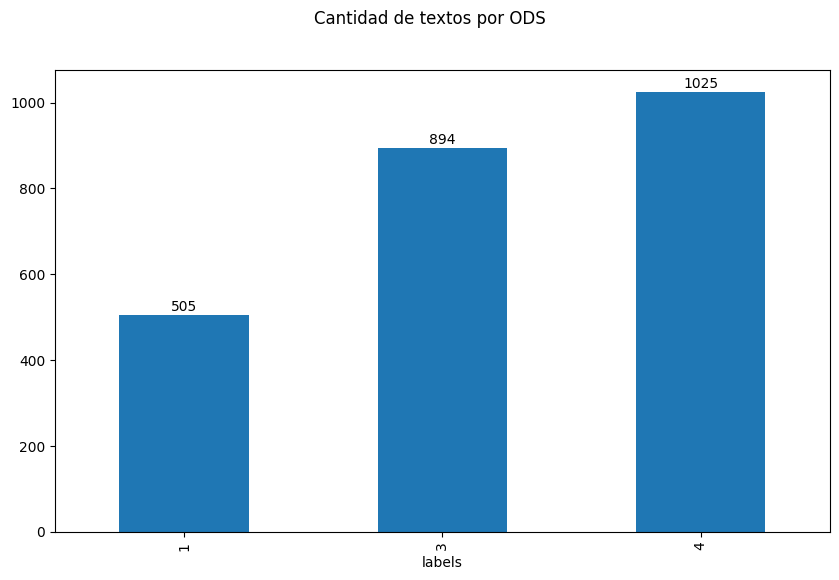

In [149]:
#Hagamos un diagrama de barras para ver la cantidad de textos por ODS
fig, ax = plt.subplots(figsize=(10, 6))
df_ods['labels'].value_counts().sort_index().plot(kind='bar', ax=ax)
fig.suptitle('Cantidad de textos por ODS')
#Pongamos el valor encima de cada barra
for indice_barra, valor in enumerate(df_ods['labels'].value_counts().sort_index()): 
    ax.text(indice_barra, valor + 3, str(valor), ha='center', va='bottom')
plt.show()

Vamos a extraer los textos de la clase 1 y guardarlos en un diccionario de diccionarios llamado texto_minoria

In [150]:
textos_minoria = df_ods[df_ods["labels"] == 1]["tokens_limpios"].tolist()
textos_minoria

[['de',
  'hecho',
  'aunque',
  'chile',
  'y',
  'uruguay',
  'tienen',
  'índices',
  'de',
  'pobreza',
  'similares',
  'la',
  'pobreza',
  'infantil',
  'en',
  'chile',
  'es',
  'dieciocho',
  'veces',
  'mayor',
  'que',
  'la',
  'de',
  'la',
  'población',
  'adulta',
  'mientras',
  'que',
  'en',
  'uruguay',
  'es',
  'treinta y uno',
  'veces',
  'mayor',
  'esto',
  'produciría',
  'tasas',
  'de',
  'pobreza',
  'infantil',
  'artificialmente',
  'altas',
  'esta',
  'línea',
  'representa',
  'el',
  'costo',
  'de',
  'satisfacer',
  'las',
  'necesidades',
  'básicas',
  'de',
  'una',
  'persona',
  'medir',
  'la',
  'pobreza',
  'de',
  'esta',
  'manera',
  'supone',
  'que',
  'el',
  'costo',
  'per',
  'cápita',
  'de',
  'satisfacer',
  'las',
  'necesidades',
  'básicas',
  'de',
  'un',
  'individuo',
  'no',
  'se',
  've',
  'afectado',
  'por',
  'el',
  'número',
  'de',
  'personas',
  'que',
  'viven',
  'en',
  'un',
  'hogar',
  'o',
  'por',
  '

Vamos a crear la cadena de Markov, de orden 2 (Usando de a 2 palabras para predecir la siguiente) y definiendo las proabilbidades basado en la frecuencia que aparece una siguiente palabra despues de la tupla

In [151]:
import random
from collections import defaultdict

def new_markov_model(tokens_list, order=2): # Orden 2: Estamos usando de a 2 palabras para predecir la siguiente

    # Un diccionario donde cada clave es una tupla de 2 palabras y el valor es una lista de palabras que pueden seguir a esa tupla
    model = defaultdict(list) 
    for tokens in tokens_list: 
        for i in range(len(tokens) - order):
            # La clave es una tupla de las dos palabras actuales 
            key = tuple(tokens[i:i+order]) 

            # La palabra que sigue a la tupla
            next_word = tokens[i+order] 

            # Agregamos la palabra siguiente a la lista de posibles continuaciones para esa tupla
            model[key].append(next_word) 

    return model

markov_model = new_markov_model(textos_minoria, order=2)


Ahora definimos una funcion encargada de estructurar las distintas oraciones basado en los resultados de la cadena de markov. Como vimos anteriormente las oraciones tienen en promedio 62 oraciones. Por lo que generaremos oraciones con 62 palabras. En la siguiente celda, tambien se incluye un ejemplo

In [152]:
def crear_oracion(model, length=62):
    estadoInicial = random.choice(list(model.keys()))
    resultado = list(estadoInicial)
    for _ in range(length):
        next_words = model.get(tuple(resultado[-2:]))
        if not next_words:
            break
        resultado.append(random.choice(next_words))
    return resultado

# Ejemplo
print(crear_oracion(markov_model, length=62))


['johannes', 'jutting', 'marco', 'mira', 'dercole', 'y', 'martin', 'ravallion', 'por', 'lo', 'tanto', 'el', 'aumento', 'se', 'debió', 'más', 'a', 'las', 'personas', 'vio', 'crecer', 'sus', 'ingresos', 'sino', 'simplemente', 'porque', 'el', 'tamaño', 'del', 'hogar', 'para', 'ello', 'se', 'analizó', 'el', 'grupo', 'de', 'trabajo', 'o', 'viajes', 'largos', 'la', 'evidencia', 'de', 'polarización', 'laboral', 'al', 'mostrar', 'un', 'patrón', 'en', 'forma', 'monetaria', 'necesaria', 'para', 'su', 'sustento', 'esto', 'se', 'debió', 'en', 'parte', 'frenada', '—no']


Ahora definimos la funcion encargada de reemplazar sinonimos de una oracion, esto lo hacemos con el objetivo de evitar overfitting del modelo. Pues acabamos de generar una serie de datos que utilizan las mismas palabras de los datos actuales de la clase "1", por lo que puede que el modelo solo aprenda a indentificar esas palabras. Al usar sinonimos, lo que hacemos es expandir el concepto de la clase "1" y permitirle identificar otro tipo de oraciones que traten del mismo tema.

In [153]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
import random
from nltk.corpus import wordnet as wn

def reemplazar_sinonimos(texto, n=30): # Reemplaza hasta n palabras en el texto por sinónimos
    tokens = texto.split()
    new_tokens = tokens.copy()
    words = [w for w in tokens if w.isalpha()] 
    random.shuffle(words) # Mezclamos las palabras para que el reemplazo sea aleatorio
    replaced = 0

    for word in words:
        synsets = wn.synsets(word, lang="spa") # Obtenemos los synsets en español
        lemmas = set() # Usamos un set para evitar duplicados
        for syn in synsets:
            for l in syn.lemma_names("spa"): # Obtenemos los nombres de los lemas en español
                if l.lower() != word.lower():
                    lemmas.add(l.replace("_", " "))
        if lemmas:
            synonym = random.choice(list(lemmas)) # Elegimos un sinónimo aleatorio
            idx = new_tokens.index(word) # Encontramos el índice de la palabra original
            new_tokens[idx] = synonym # Reemplazamos por el sinónimo
            replaced += 1
        if replaced >= n:
            break

    return " ".join(new_tokens)

# Ejemplo
print(reemplazar_sinonimos("La educación es fundamental para el desarrollo", n=2))


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...


La instrucción es central para el desarrollo


Ya con las funciones crear_oracion y reemplazar_sinonimos definidas, lo siguiente es generar 400 nuevas oraciones e incluirlas sobre la clase 1. 

In [154]:
# Generar textos sintéticos para balancear la clase minoritaria (ODS 1)
def generar_textos_sinteticos(modelo_markov, num_textos=400, longitud_promedio=62):
    textos_sinteticos = []
    
    for _ in range(num_textos):
        # Generar texto base con cadena de Markov
        texto_generado = crear_oracion(modelo_markov, length=longitud_promedio)
        
        # Aplicar reemplazo de sinónimos para mayor variabilidad
        texto_str = " ".join(texto_generado)
        texto_con_sinonimos = reemplazar_sinonimos(texto_str, n=2)
        
        # Convertir de vuelta a tokens
        tokens_sinteticos = texto_con_sinonimos.split()
        textos_sinteticos.append(tokens_sinteticos)
    return textos_sinteticos

# Generar aproximadamente 400 textos sintéticos para balancear la clase 1
textos_sinteticos = generar_textos_sinteticos(markov_model, num_textos=400, longitud_promedio=62)

print(f"Se generaron {len(textos_sinteticos)} textos sintéticos")
print("\nEjemplos de textos sintéticos generados:")
for i in range(3):
    print(f"Texto {i+1}: {' '.join(textos_sinteticos[i])}")

# Crear un DataFrame con los textos sintéticos tokenizados y la etiqueta 1
df_sinteticos = pd.DataFrame({
    "tokens_limpios": [ texto for texto in textos_sinteticos],
    'labels': [1] * len(textos_sinteticos)
})

Se generaron 400 textos sintéticos

Ejemplos de textos sintéticos generados:
Texto 1: dispersión socioeconómica las intervenciones de protección social este se enfocará tuerca tres eran al menos un quince anual si bien las intervenciones de protección social tradicional e informal en las estadísticas de pobreza en vietnam diecinueve millones novecientos treinta y dos mil dos un enfoque de las personas pueden experimentar varios tipos de incertidumbres los problemas de vivienda veintidós por ciento de la pobreza en comparación con el umbral nacional de
Texto 2: y regional diecisiete millones ciento noventa y siete mil doscientos quince apertura comercial o el crecimiento medio del ingreso disponible lleva número atómico 13 divorcio charles y stephens dos mil cuatro muestran que los países con mayores descensos de la comisión de planificación de la pobreza utilizando líneas nacionales de desarrollo del milenio para dos mil quince además la proporción de trabajadores ocupados que cotizan 

In [155]:
# Copiar dataframe original y a ese añadir los textos sintéticos
df_ods_aumentado = pd.concat([df_ods[["tokens_limpios", 'labels']], df_sinteticos], ignore_index=True)
df_ods_aumentado

,tokens_limpios,labels
0,"[aprendizaje, y, educación, se, consideran, si...",4
1,"[para, los, niños, más, pequeños, bebés, y, ni...",4
2,"[además, la, formación, de, especialistas, en,...",3
3,"[en, los, países, de, la, ocde, se, tiende, a,...",4
4,"[este, grupo, se, centró, en, las, personas, q...",3
...,...,...
2819,"[adulto, en, la, pobreza, extrema, enfrentan, ...",1
2820,"[aborda, las, preguntas, sobre, ingresos, pobr...",1
2821,"[aumentar, los, ingresos, o, en, los, ingresos...",1
2822,"[educativo, y, la, operación, del, gobierno, D...",1


Revisamos nuevamente la cantidad de oraciones que encontramos por ODS y podemos observar que ya se encuentra mas balanceado

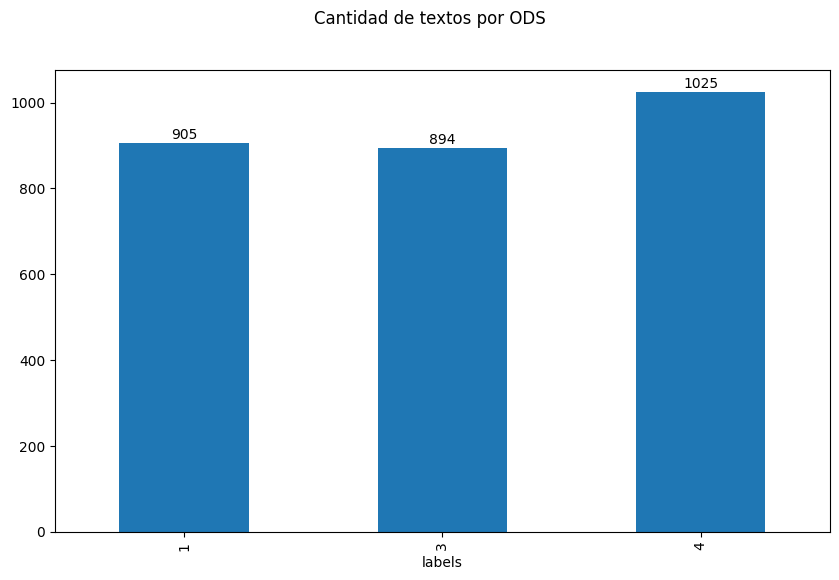

In [156]:
#Hagamos un diagrama de barras para ver la cantidad de textos por ODS
fig, ax = plt.subplots(figsize=(10, 6))
df_ods_aumentado['labels'].value_counts().sort_index().plot(kind='bar', ax=ax)
fig.suptitle('Cantidad de textos por ODS')
#Pongamos el valor encima de cada barra
for indice_barra, valor in enumerate(df_ods_aumentado['labels'].value_counts().sort_index()): 
    ax.text(indice_barra, valor + 3, str(valor), ha='center', va='bottom')
plt.show()

Ahora con los datos generados vamos a proceder a la transformacion necesaria de datos para poder implementarlos dentro de la red neuronal

### 3.2.2. Transformaciones Adicionales Previo a Modelo de Red Neuronal

Hacemos el proceso de lematización

In [157]:
#Lematizamos los tokens

#Aplicamos la lematización
df_ods_aumentado = lematizar_los_tokens(df_ods_aumentado, "tokens_limpios", "tokens_lematizados")

#Veamos cómo quedaron los tokens lematizados
display(df_ods_aumentado[["tokens_limpios", "tokens_lematizados"]].head())


,tokens_limpios,tokens_lematizados
0,"[aprendizaje, y, educación, se, consideran, si...","[aprendizaje, y, educación, él, considerar, si..."
1,"[para, los, niños, más, pequeños, bebés, y, ni...","[para, el, niño, más, pequeño, bebé, y, niño, ..."
2,"[además, la, formación, de, especialistas, en,...","[además, el, formación, de, especialista, en, ..."
3,"[en, los, países, de, la, ocde, se, tiende, a,...","[en, el, país, de, el, ocde, él, tender, a, pa..."
4,"[este, grupo, se, centró, en, las, personas, q...","[este, grupo, él, centrar, en, el, persona, qu..."


Hacemos una normalización final con el fin de dejar el texto en un mismo formato:
1. Eliminamos stopwords
2. Quitamos las tildes, que no estaban incluidas en la vez que quitamos los signos de puntuación
3. Nos aseguramos de no dejar palabras vacías

In [158]:

#Aplicamos la normalización final
df_ods_aumentado["tokens_finales"] = df_ods_aumentado["tokens_lematizados"].apply(normalizar_texto)

#Veamos cómo quedaron los tokens finales
df_ods_aumentado[["tokens_lematizados", "tokens_finales"]].head()



,tokens_lematizados,tokens_finales
0,"[aprendizaje, y, educación, él, considerar, si...","[aprendizaje, educacion, considerar, sinonir, ..."
1,"[para, el, niño, más, pequeño, bebé, y, niño, ...","[niño, mas, pequeño, bebe, niño, pequeño, capa..."
2,"[además, el, formación, de, especialista, en, ...","[ademas, formacion, especialista, medicina, ge..."
3,"[en, el, país, de, el, ocde, él, tender, a, pa...","[pais, ocde, tender, pasar, curso, obligatorio..."
4,"[este, grupo, él, centrar, en, el, persona, qu...","[grupo, centrar, persona, padecer, trastorno, ..."


Transformaremos los tokens en numeros, de modo que la red neuronal puede interpretarlar las palabras. 

Esto en primera instancia puede parecer que sesgara nuestro modelo en terminos de que no existe una traduccion exacta entre palabras y numeros enteros; sin embargo, mas alla de la relacion entre los numeros y las operaciones que se pueden realizar, la red solo busca aprender patrones dentro del orden de las palabras y esto funciomna siempre y cuando **no se mezclen palabras de textos diferentes ni se altere la posicion durante el preprocesamiento**

In [161]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Crear el tokenizer
tokenizer = Tokenizer()

# Convertir tokens a strings
textos_como_str = [' '.join(tokens) for tokens in df_ods_aumentado['tokens_limpios']]

# Ajustar el tokenizer a los textos y convertir a secuencias
tokenizer.fit_on_texts(textos_como_str)
sequences = tokenizer.texts_to_sequences(textos_como_str)


Ya tenemos todo en secuencias numericas; sin embargo, estas tienen diferentes longitudes y en una red neuronal necesitamos que todas las entradas tengan el mismo tamaño. Por lo que vamos a hacer **Padding**, es decir, agregar ceros para igualar la longitud. Vamos a hacer que todas las oraciones se queden con la cantidad de palabras del promedio (62). Si es menor agrega ceros. Si es mayor, recorta en la palabra 62.

In [162]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 62
x = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')
x

array([[  63,    3,   28, ...,    0,    0,    0],
       [  10,    5,   44, ...,   10, 1791,  523],
       [ 109,    2,  120, ...,    7,  630,  232],
       ...,
       [ 280,    5,   51, ..., 1673,    1,    5],
       [ 189,    3,    2, ...,   55,   27,    2],
       [ 766,   69,  538, ...,    2,   21,   31]],
      shape=(2824, 62), dtype=int32)

Tambien convertiremos las etiquetas a numeros, esto lo haremos con one-hot encoding, que no afecta en gran medida la complejidad de nuestro modelo, pues solo tenemos 3 etiquetas

In [163]:
from tensorflow.keras.utils import to_categorical

# Convertir etiquetas a one-hot encoding
# Primero mapeamos las etiquetas 1,3,4 a 0,1,2 para que sean consecutivas
label_mapping = {1: 0, 3: 1, 4: 2}
y_mapped = df_ods_aumentado['labels'].map(label_mapping)

# Aplicar one-hot encoding
y = to_categorical(y_mapped, num_classes=3)

print("Forma de y después del one-hot encoding:", y.shape)
print("Ejemplo de etiquetas one-hot:")
print("Etiqueta original -> One-hot")
for i in range(5):
    original = df_ods_aumentado['labels'].iloc[i]
    one_hot = y[i]
    print(f"ODS {original} -> {one_hot}")
y

Forma de y después del one-hot encoding: (2824, 3)
Ejemplo de etiquetas one-hot:
Etiqueta original -> One-hot
ODS 4 -> [0. 0. 1.]
ODS 4 -> [0. 0. 1.]
ODS 3 -> [0. 1. 0.]
ODS 4 -> [0. 0. 1.]
ODS 3 -> [0. 1. 0.]


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], shape=(2824, 3))

In [164]:
from sklearn.model_selection import train_test_split
import numpy as np

# Dividir los datos para entrenamiendo y validación
# Solo usamos los datos originales (primeros 2424) para la validación
# Los datos sintéticos (desde índice 2424) solo se usan para entrenamiento

# Primero separamos datos originales de los sintéticos
datos_originales = df_ods_aumentado.iloc[:2424]  # Primeros 2424 son datos originales
datos_sinteticos = df_ods_aumentado.iloc[2424:]  # Resto son sintéticos

# Dividir solo los datos originales en entrenamiento y validación
X_original = x[:2424]  # Secuencias numéricas de datos originales
y_original = y[:2424]  # Etiquetas one-hot de datos originales

# División de datos originales (80% entrenamiento, 20% validación)
X_train_orig, X_val, y_train_orig, y_val = train_test_split(
    X_original, y_original, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_original.argmax(axis=1)  # Estratificar por las clases
)

# Ahora agregar TODOS los datos sintéticos al conjunto de entrenamiento
X_sinteticos = x[2424:]  # Secuencias numéricas de datos sintéticos
y_sinteticos = y[2424:]  # Etiquetas one-hot de datos sintéticos

# Concatenar datos de entrenamiento originales con todos los sintéticos
X_train_final = np.concatenate([X_train_orig, X_sinteticos], axis=0)
y_train_final = np.concatenate([y_train_orig, y_sinteticos], axis=0)

print(f"Datos de entrenamiento: {X_train_final.shape[0]} muestras")
print(f"Datos de validación: {X_val.shape[0]} muestras")
print(f"- Datos originales en entrenamiento: {X_train_orig.shape[0]}")
print(f"- Datos sintéticos en entrenamiento: {X_sinteticos.shape[0]}")
print(f"- Datos originales en validación: {X_val.shape[0]}")

# Verificar distribución de clases
print("\nDistribución de clases en entrenamiento:")
train_labels = y_train_final.argmax(axis=1)
unique, counts = np.unique(train_labels, return_counts=True)
for i, count in zip(unique, counts):
    ods_num = [1, 3, 4][i]
    print(f"ODS {ods_num}: {count} muestras")

print("\nDistribución de clases en validación:")
val_labels = y_val.argmax(axis=1)
unique, counts = np.unique(val_labels, return_counts=True)
for i, count in zip(unique, counts):
    ods_num = [1, 3, 4][i]
    print(f"ODS {ods_num}: {count} muestras")

Datos de entrenamiento: 2339 muestras
Datos de validación: 485 muestras
- Datos originales en entrenamiento: 1939
- Datos sintéticos en entrenamiento: 400
- Datos originales en validación: 485

Distribución de clases en entrenamiento:
ODS 1: 804 muestras
ODS 3: 715 muestras
ODS 4: 820 muestras

Distribución de clases en validación:
ODS 1: 101 muestras
ODS 3: 179 muestras
ODS 4: 205 muestras


In [165]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# --- Parámetros ---
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 128
max_length = 62

# --- Crear modelo mejorado ---
modelo_rnn = Sequential([
    # Embedding entrenable
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    
    # Primera capa LSTM bidireccional
    Bidirectional(LSTM(128, return_sequences=True, recurrent_dropout=0.2)),
    Dropout(0.4),
    
    # Segunda capa LSTM bidireccional
    Bidirectional(LSTM(64, recurrent_dropout=0.2)),
    Dropout(0.4),
    
    # Capas densas con BatchNormalization
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    # Capa de salida
    Dense(3, activation='softmax')
])

# --- Compilar modelo ---
modelo_rnn.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

modelo_rnn.summary()

# --- Callbacks ---
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-7
)

# --- Entrenar modelo ---
history = modelo_rnn.fit(
    X_train_final, y_train_final,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)


C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 12s 73ms/step - accuracy: 0.3446 - loss: 1.5182 - val_accuracy: 0.3608 - val_loss: 1.0840 - learning_rate: 0.0010
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.4579 - loss: 1.1480 - val_accuracy: 0.6990 - val_loss: 0.8083 - learning_rate: 0.0010
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.7277 - loss: 0.6501 - val_accuracy: 0.6247 - val_loss: 0.8078 - learning_rate: 0.0010
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.8717 - loss: 0.3700 - val_accuracy: 0.8763 - val_loss: 0.4308 - learning_rate: 0.0010
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.9295 - loss: 0.2333 - val_accuracy: 0.8990 - val_loss: 0.2974 - learning_rate: 0.0010
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.9786 - loss: 0.1125 - val_accuracy: 0.9299 - val_loss: 0.2081 - learning_rate: 0.0010
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.9671 - loss: 0.1277 - val_ac

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step
=== MÉTRICAS DEL MODELO DE RED NEURONAL ===

Resultados en el conjunto de validación:
              precision    recall  f1-score   support

           1      0.956     0.861     0.906       101
           3      0.907     0.927     0.917       179
           4      0.938     0.966     0.952       205

    accuracy                          0.930       485
   macro avg      0.934     0.918     0.925       485
weighted avg      0.931     0.930     0.930       485



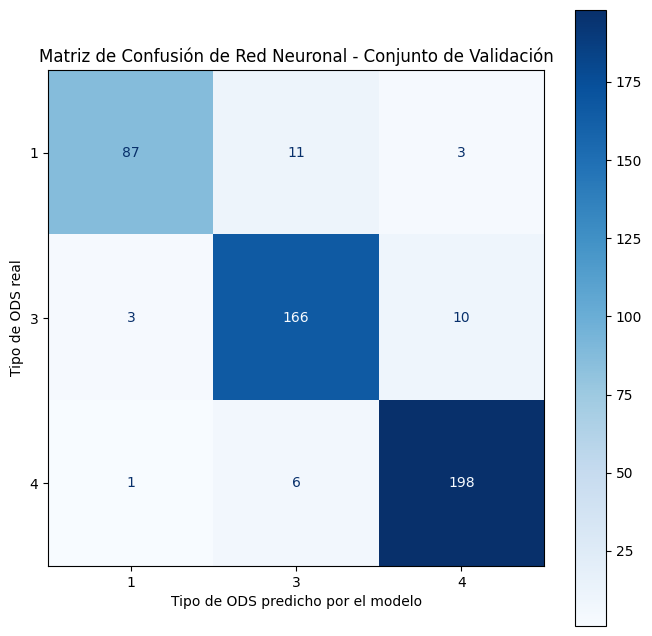

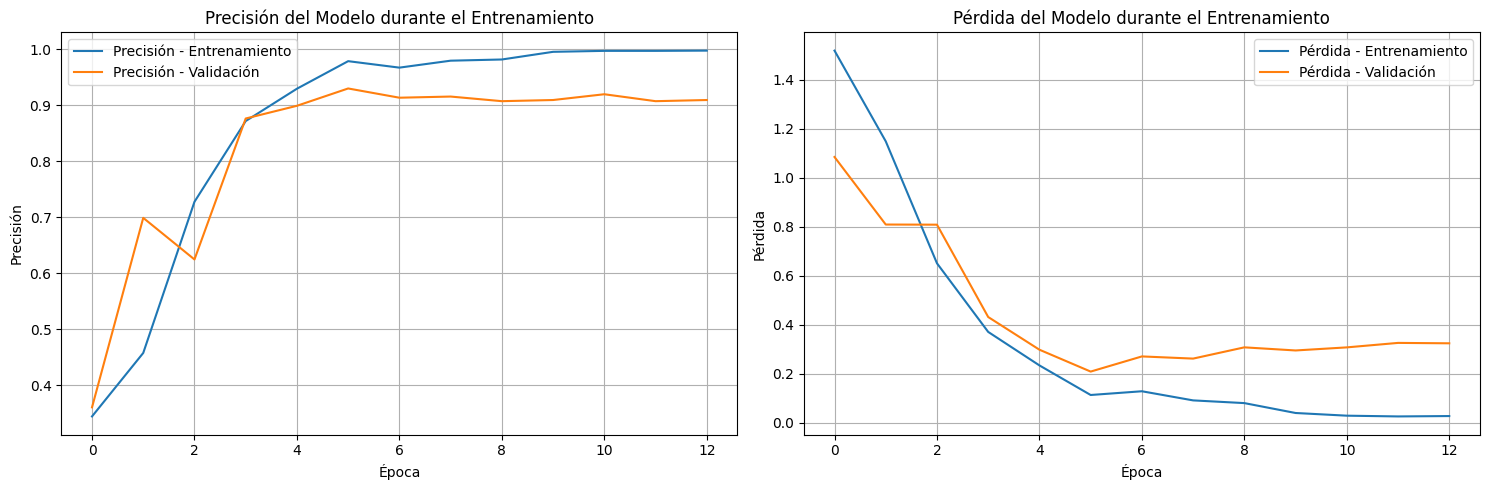


Precisión final en validación: 0.930
Número de épocas entrenadas: 13


In [166]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Mostrar métricas del modelo de Red Neuronal
import matplotlib.pyplot as plt

# Obtener las predicciones del conjunto de validación
y_val_pred_classes = modelo_rnn.predict(X_val).argmax(axis=1)
y_val_true = y_val.argmax(axis=1)

# Convertir de vuelta a las etiquetas originales (1, 3, 4)
label_mapping_reverse = {0: 1, 1: 3, 2: 4}
y_val_true_original = [label_mapping_reverse[label] for label in y_val_true]
y_val_pred_original = [label_mapping_reverse[label] for label in y_val_pred_classes]

print("=== MÉTRICAS DEL MODELO DE RED NEURONAL ===")
print("\nResultados en el conjunto de validación:")
print(classification_report(y_val_true_original, y_val_pred_original, digits=3))

# Matriz de confusión

fig, ax = plt.subplots(figsize=(8, 8))
cm_display = ConfusionMatrixDisplay.from_predictions(
    y_val_true_original, y_val_pred_original, 
    cmap="Blues", ax=ax
)
ax.set_ylabel("Tipo de ODS real")
ax.set_xlabel("Tipo de ODS predicho por el modelo")
plt.title("Matriz de Confusión de Red Neuronal - Conjunto de Validación")
plt.show()

# Gráfico del historial de entrenamiento
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Precisión
ax1.plot(history.history['accuracy'], label='Precisión - Entrenamiento')
ax1.plot(history.history['val_accuracy'], label='Precisión - Validación')
ax1.set_title('Precisión del Modelo durante el Entrenamiento')
ax1.set_xlabel('Época')
ax1.set_ylabel('Precisión')
ax1.legend()
ax1.grid(True)

# Pérdida
ax2.plot(history.history['loss'], label='Pérdida - Entrenamiento')
ax2.plot(history.history['val_loss'], label='Pérdida - Validación')
ax2.set_title('Pérdida del Modelo durante el Entrenamiento')
ax2.set_xlabel('Época')
ax2.set_ylabel('Pérdida')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

print(f"\nPrecisión final en validación: {max(history.history['val_accuracy']):.3f}")
print(f"Número de épocas entrenadas: {len(history.history['loss'])}")

In [167]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Probemos la red neuronal sobre los datos originales antes de la aumentación

# Primero necesitamos preparar los datos originales (sin datos sintéticos)

# Preparar corpus original con tokens finales
corpus_original = df_ods["tokens_finales"].apply(lambda toks: " ".join(toks)).fillna("")

# Crear nuevo tokenizer para datos originales
tokenizer_original = Tokenizer()
textos_como_str_original = [' '.join(tokens) for tokens in df_ods['tokens_finales']]
tokenizer_original.fit_on_texts(textos_como_str_original)
sequences_original = tokenizer_original.texts_to_sequences(textos_como_str_original)

# Padding
max_len_original = 62
X_original = pad_sequences(sequences_original, maxlen=max_len_original, padding='post', truncating='post')

# Convertir etiquetas
y_original_mapped = df_ods['labels'].map(label_mapping)
y_original_encoded = to_categorical(y_original_mapped, num_classes=3)

# División train/test estratificada
X_train_orig_only, X_test_orig_only, y_train_orig_only, y_test_orig_only = train_test_split(
    X_original, y_original_encoded, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_original_mapped
)

print(f"Datos originales - Entrenamiento: {X_train_orig_only.shape[0]} muestras")
print(f"Datos originales - Prueba: {X_test_orig_only.shape[0]} muestras")

# Crear modelo para datos originales
vocab_size_original = len(tokenizer_original.word_index) + 1

modelo_rnn_original = Sequential([
    Embedding(input_dim=vocab_size_original, output_dim=128, input_length=max_len_original),
    Bidirectional(LSTM(128, return_sequences=True, recurrent_dropout=0.2)),
    Dropout(0.4),
    Bidirectional(LSTM(64, recurrent_dropout=0.2)),
    Dropout(0.4),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

modelo_rnn_original.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenar modelo con datos originales solamente
print("\n=== ENTRENANDO RED NEURONAL CON DATOS ORIGINALES (SIN AUMENTACIÓN) ===")
history_original = modelo_rnn_original.fit(
    X_train_orig_only, y_train_orig_only,
    validation_data=(X_test_orig_only, y_test_orig_only),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Datos originales - Entrenamiento: 1939 muestras
Datos originales - Prueba: 485 muestras

=== ENTRENANDO RED NEURONAL CON DATOS ORIGINALES (SIN AUMENTACIÓN) ===
Epoch 1/50


C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step - accuracy: 0.3491 - loss: 1.5281 - val_accuracy: 0.4227 - val_loss: 1.0372 - learning_rate: 0.0010
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.6601 - loss: 0.7713 - val_accuracy: 0.8041 - val_loss: 0.6603 - learning_rate: 0.0010
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.8473 - loss: 0.3965 - val_accuracy: 0.9381 - val_loss: 0.4131 - learning_rate: 0.0010
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.9458 - loss: 0.2031 - val_accuracy: 0.9485 - val_loss: 0.2299 - learning_rate: 5.0000e-04
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.9660 - loss: 0.1507 - val_accuracy: 0.9485 - val_loss: 0.1732 - learning_rate: 5.0000e-04
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9892 - loss: 0.0923 - val_accuracy: 0.9505 - val_loss: 0.1583 - learning_rate: 5.0000e-04
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.9856 - loss: 0.0862 - val_a

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
=== MÉTRICAS DEL MODELO DE RED NEURONAL CON DATOS ORIGINALES ===

Resultados en el conjunto de prueba (datos originales sin aumentación):
              precision    recall  f1-score   support

           1      0.866     0.960     0.911       101
           3      0.966     0.961     0.964       179
           4      0.985     0.937     0.960       205

    accuracy                          0.951       485
   macro avg      0.939     0.953     0.945       485
weighted avg      0.953     0.951     0.951       485



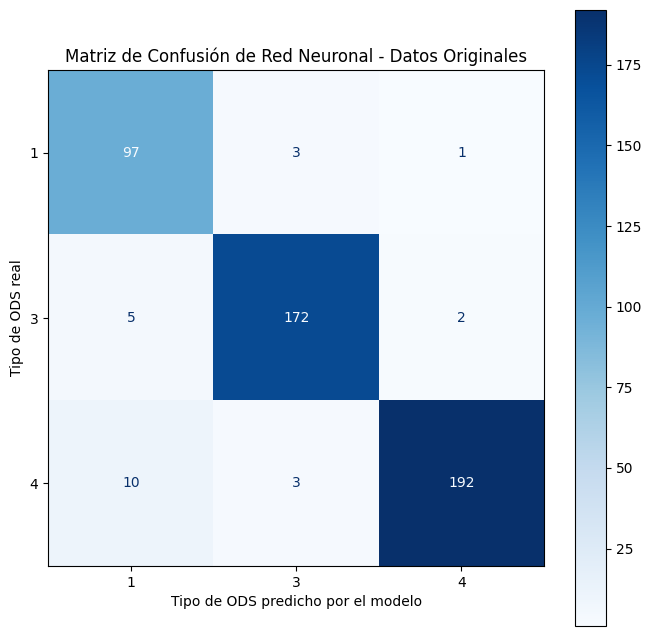

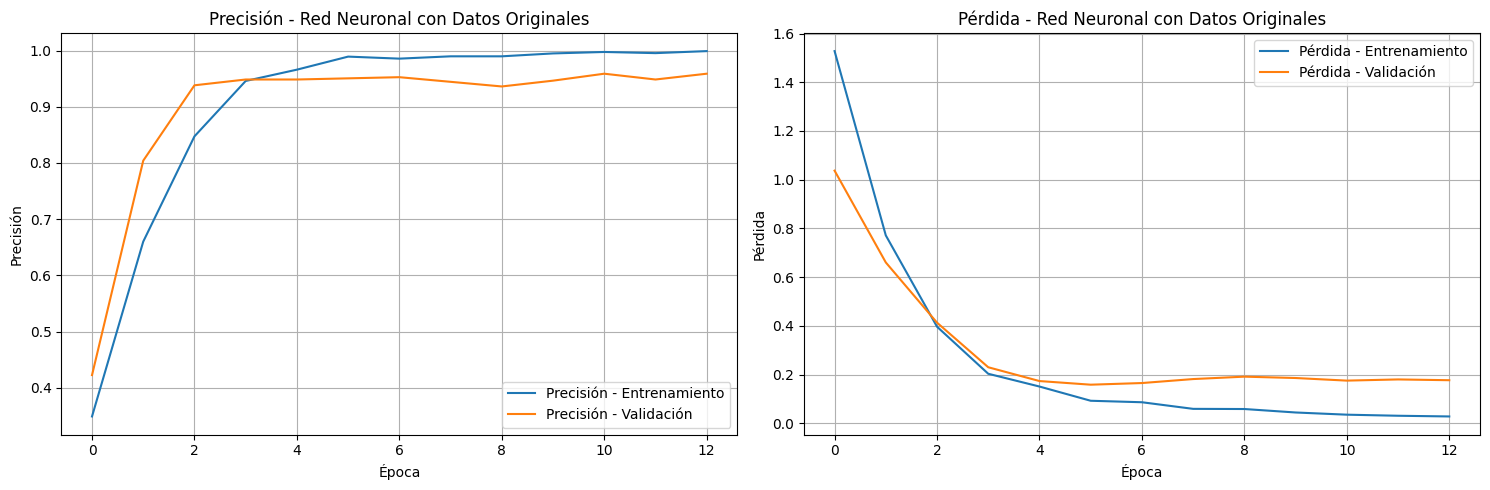


Precisión final en prueba (datos originales): 0.959
Número de épocas entrenadas: 13


In [168]:
# Obtener las predicciones del modelo de Red Neuronal con datos originales
y_pred_orig_classes = modelo_rnn_original.predict(X_test_orig_only).argmax(axis=1)
y_true_orig = y_test_orig_only.argmax(axis=1)

# Convertir de vuelta a las etiquetas originales (1, 3, 4)
y_true_orig_labels = [label_mapping_reverse[label] for label in y_true_orig]
y_pred_orig_labels = [label_mapping_reverse[label] for label in y_pred_orig_classes]

print("=== MÉTRICAS DEL MODELO DE RED NEURONAL CON DATOS ORIGINALES ===")
print("\nResultados en el conjunto de prueba (datos originales sin aumentación):")
print(classification_report(y_true_orig_labels, y_pred_orig_labels, digits=3))

# Matriz de confusión para datos originales
fig, ax = plt.subplots(figsize=(8, 8))
cm_display_orig = ConfusionMatrixDisplay.from_predictions(
    y_true_orig_labels, y_pred_orig_labels, 
    cmap="Blues", ax=ax
)
ax.set_ylabel("Tipo de ODS real")
ax.set_xlabel("Tipo de ODS predicho por el modelo")
plt.title("Matriz de Confusión de Red Neuronal - Datos Originales")
plt.show()

# Gráfico del historial de entrenamiento con datos originales
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Precisión
ax1.plot(history_original.history['accuracy'], label='Precisión - Entrenamiento')
ax1.plot(history_original.history['val_accuracy'], label='Precisión - Validación')
ax1.set_title('Precisión - Red Neuronal con Datos Originales')
ax1.set_xlabel('Época')
ax1.set_ylabel('Precisión')
ax1.legend()
ax1.grid(True)

# Pérdida
ax2.plot(history_original.history['loss'], label='Pérdida - Entrenamiento')
ax2.plot(history_original.history['val_loss'], label='Pérdida - Validación')
ax2.set_title('Pérdida - Red Neuronal con Datos Originales')
ax2.set_xlabel('Época')
ax2.set_ylabel('Pérdida')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

print(f"\nPrecisión final en prueba (datos originales): {max(history_original.history['val_accuracy']):.3f}")
print(f"Número de épocas entrenadas: {len(history_original.history['loss'])}")

### 3.3. Estudiante 1 - Juan Sebastián Ardila López: Modelo de Cosine KNN

El principio detrás de los métodos de vecinos más cercanos es encontrar un número predefinido de muestras de entrenamiento más cercanas en distancia al nuevo punto, y predecir la etiqueta a partir de estas. El número de muestras puede ser una constante definida por el usuario (aprendizaje k-nearest neighbor), o variar según la densidad local de los puntos (aprendizaje basado en radio). La distancia puede, en general, ser cualquier medida métrica: la distancia euclidiana estándar es la opción más común. Los métodos basados en vecinos se conocen como métodos de aprendizaje automático no generalizadores, ya que simplemente “recuerdan” todos sus datos de entrenamiento (posiblemente transformados en una estructura de indexación rápida como un Ball Tree o KD Tree).

Escogí el algoritmo de KNN teniendo en cuenta las siguientes razones:

1. Es un algoritmo clásico que permite llevar a cabo la clasificación de datos basado en comparar datos conocidos con los que cuenta semejanza.
2. KNN cuenta con múltiples hiperparametros que permiten ser ajustados para encontrar la mejor configuración posible que maximiza alguna métrica que deseemos mejorar. Algunos de estos hiperparametros son : 

- n_neighbors : corresponde a la cantidad de datos que vamos a tomar como vecinos para estimar a cual clase corresponde dicho dato. Por ejemplo, si tenemos 3 vecinos. Vamos a buscar los tres vecinos más cercanos y vamos a ver cual clase es mayoría en este caso. Siempre son números impares para que no haya empate entre clases binarias.
- weights : corresponde como pesar la influencia de los vecinos. Por ejemplo, ¿Solo vamos a seleccionar la clase basada en cual clase es mayoría ? ¿O vamos a ponderar cúal clase tiene menor distancia a los datos que estamos prediciendo?
- metric : Corresponde a formas de medir la distancia entre el punto de interés, por ejemplo, una distancia euclidiana (raiz de la suma de los cuadrados de la diferencia de cada parametro), manhatan (suma de los valores absolutos de la diferencia de cada parametro),  o coseno (compara la ortonormalidad de dos set de datos basado en sus parametros partiendo de la definición del producto punto).

3. Es un modelo de fácil interpretación, se puede describir ante el negocio que está haciendo el algoritmo.

4. El reentrenamiento repetitivo es sencillo, no tiene un gran costo computacional hacer ajustes al modelo y este es uno de los deseos del negocio (descrito en la entrega 2).

Fuentes:

* Scikit-learn developers. (2025). 1.6. Nearest Neighbors. scikit-learn. Recuperado el 11 de septiembre de 2025, de https://scikit-learn.org/stable/modules/neighbors.html

* Codigo Maquina. (2022, 7 de febrero). 3 Tipos de Distancias para Técnicas de Clustering con Python: Euclidiana, Chebyshev y Manhattan [Video]. YouTube. http://youtube.com/watch?v=1g49iwKrV-U

* Codigo Maquina. (2024, 11 de diciembre). Qué es la Similitud Coseno: Usos Prácticos en Machine Learning con Python [Video]. YouTube. https://www.youtube.com/watch?v=cPFaMiGk5J0

In [169]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

variable_objetivo = df_ods["labels"] #Especificamos la variable objetivo

#Realizamos la separación de datos
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, variable_objetivo, test_size=0.3, random_state=32, stratify=variable_objetivo)

# Definimos el modelo de KNN y los hiperparámetros sobre los cuales vamos a buscar la mejor permutación
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11], #Número de vecinos a considerar
    'weights': ['uniform', 'distance'], #Cómo pesar la influencia de los vecinos
    'metric': ['euclidean', 'manhattan', 'cosine'] #Formas de medir la distancia
}

# Búsqueda con cross-validation
grid_search = GridSearchCV(
    estimator=knn, #Modelo sobre el cual iterar
    param_grid=param_grid, #Hiperparámetros a probar
    cv=5, # 5-fold cross validation
    scoring='accuracy', #Metrica para evaluar el mejor modelo
    n_jobs=-1 
)

grid_search.fit(X_train, y_train) #Entrenamos el modelo y buscamos los mejores hiperparametros

best_knn = grid_search.best_estimator_ #Guardamos el mejor modelo encontrado

In [170]:
#Ahora veamos las métricas del modelo

#Para ver cómo anda el modelo, veamos las métricas en el conjunto de entrenamiento y en el de prueba
print("Resultados del modelo de KNN en el conjunto de entrenamiento:")
print(classification_report(y_train, best_knn.predict(X_train), digits=3))


print("Resultados del modelo de KNN en el conjunto de prueba:")
print(classification_report(y_test, best_knn.predict(X_test),  digits=3))

mejores_parametros = grid_search.best_params_

# Imprimir los resultados
print("Los mejores hiperparámetros encontrados son:")
print(mejores_parametros)

Resultados del modelo de KNN en el conjunto de entrenamiento:
              precision    recall  f1-score   support

           1      0.952     0.963     0.958       353
           3      0.968     0.971     0.970       626
           4      0.983     0.975     0.979       717

    accuracy                          0.971      1696
   macro avg      0.968     0.970     0.969      1696
weighted avg      0.971     0.971     0.971      1696

Resultados del modelo de KNN en el conjunto de prueba:
              precision    recall  f1-score   support

           1      0.925     0.967     0.945       152
           3      0.981     0.963     0.972       268
           4      0.977     0.971     0.974       308

    accuracy                          0.967       728
   macro avg      0.961     0.967     0.964       728
weighted avg      0.968     0.967     0.967       728

Los mejores hiperparámetros encontrados son:
{'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}


**Interpretación de los resultados**

**1. Precisión**
- Hace referencia a, de todas las veces que el modelo dijo que una opinión era de la ODS X, ¿cuántas veces realmente sí pertenecía a esa ODS?, en otras palabras, ¿cuántas veces sí tenía la razón?
- Es como revisar ¿qué tan confiable es el modelo cuando afirma que una opinión es ODS 1/3/4?

- De todas las veces que el modelo clasificó una opinión como ODS 1, el 95.2% sí era ODS 1.
- De todas las veces que el modelo clasificó una opinión como ODS 3, el 96.8% sí era ODS 3.
- De todas las veces que el modelo clasificó una opinión como ODS 4, el 98.3% sí era ODS 4.

- Ninguna de ellas da 100% o 99.99% por lo que el modelo no hizo overfitting, no se aprendió los casos del entrenamiento.

**2. recall**
- Hace referencia a, de todas las veces que una opinión realmente pertenecía a cierta, ¿cuántas veces el modelo sí la identificó bien?
- Es como revisar ¿qué tanto el modelo no dejo pasar ninguna ODS 1/3/4?

- De todas las opiniones que realmente eran ODS 1, el modelo identificó correctamente el 96.3%.
- De todas las opiniones que realmente eran ODS 3, el modelo identificó correctamente el 97.1%.
- De todas las opiniones que realmente eran ODS 4, el modelo identificó correctamente el 97.5%.

- No hay sesgos sobre ninguna categoría, tiene un recall similar para las tres, aun teniendo en cuenta que en los datos de prueba tenía menos registros de la ODS 1, por lo que el balanceo funcionó efectivamente.

**3. f1-score**
- En una métrica combina precisión y recall

- Por ejemplo, precisión alta + recall bajo: el modelo casi nunca se equivoca cuando predice la clase, pero deja pasar muchos casos que sí eran de esa clase.
- Por ejemplo, Precisión baja + recall alto: el modelo encuentra casi todas las opiniones reales de esa clase, pero también se equivoca mucho y mete muchas opiniones que no eran de ese tipo.
- Por ejemplo, precisión alta + recall alto: el modelo predice bien y además no se pierde casi ningún caso.

- Para nuestro caso sucede que el modelo predice bien y además no se pierde casi ningún caso para las tres ODS. Para ODS 1, el f1-score es 95.8%.Para ODS 3, el f1-score es 97.0%. Para ODS 4, el f1-score es 97.9%.

**4. ¿Hay overfitting?**

No, pues las métricas del conjunto de entrenamiento y del conjunto de prueba no tienen diferencias significativas: 

- Si hubiese overfitting, pasaría que el modelo mostraría un rendimiento muy alto en entrenamiento (muy cerca al 100%), pero al evaluarse en el conjunto de prueba ese rendimiento caería de manera considerable (por ejemplo, podría pasar de 100% o 99% a 80%). 

- En este caso, aunque el modelo obtiene valores un poco mayores en entrenamiento, en el conjunto de prueba sigue alcanzando métricas muy altas e incluso similares a las del entrenamiento. Esto indica que el modelo generaliza bien y no hay overfitting.

**5. Mejor modelo**

Se encuentra que los mejores hiperparámetros para KNN es métrica euclidiana, 11 vecinos y pesos uniformes, lo anterior nos dice que lo que más predomina es la cercanía entre palabras de cierto tipo, es decir, si dos frases tienen un cierto número de paalabras, automáticamente estos se pueden estar clasificando en el mismo tipo de ODS

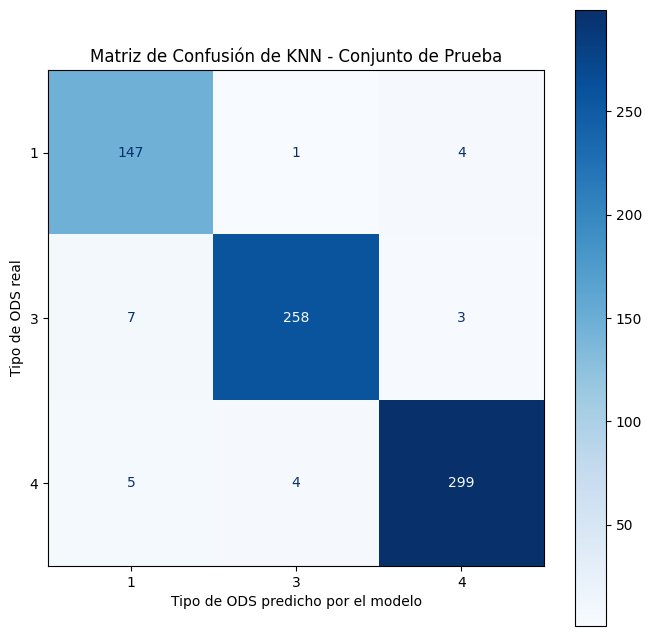

In [171]:
#Y ahora veamos la matriz de confusión
fig, ax = plt.subplots(figsize=(8, 8))
matriz_de_confusion = ConfusionMatrixDisplay.from_estimator(best_knn, X_test, y_test, cmap="Blues", ax = ax)
ax.set_ylabel("Tipo de ODS real")
ax.set_xlabel("Tipo de ODS predicho por el modelo")
plt.title("Matriz de Confusión de KNN - Conjunto de Prueba")

plt.show()

**Interpretación de la matriz de confusión**
- Primero, hay que tener muy claro que la matriz de confusión es una tabla que compara las predicciones que hizo modelo con los tipos de ODS reales.
- Para la ODS 1, 147 predicciones se hicieron correctamente como ODS 1.
- Para la ODS 3, 258 predicciones se hicieron correctamente como ODS 3.
- Para la ODS 4, 299 predicciones se hicieron correctamente como ODS 4.

**Falsos negativos**

Son los casos que sí eran de una clase, pero el modelo los negó, no los detectó y los puso como otra. Hubo 14 en total.

- Para la ODS 1, 1 caso fue mal clasificados como ODS 3 y 4 casos fue mal clasificado como ODS 4.
- Para la ODS 3, 7 casos fueron mal clasificados como ODS 1 y 3 casos fueron mal clasificados como ODS 4.
- Para la ODS 4, 5 casos fueron mal clasificados como ODS 1 y 4 casos fueron mal clasificados como ODS 3.

**Falsos positivos**

Son los casos que no eran de la clase, pero el modelo los marcó como si lo fueran, los dejó pasar como tal. Hubo 14 en total.

- Para la ODS 1, hubo 12 falsos negativos en total (7 se fueron a ODS 3 y 5 se fue a ODS 4).
- Para la ODS 3, hubo 5 falsos negativos en total (1 se fueron a ODS 1 y 4 se fueron a ODS 4).
- Para la ODS 4, hubo 7 falsos negativos en total (4 se fueron a ODS 1 y 3 se fueron a ODS 3).

**A concluir**
- La matriz de confusión es coherente con las métricas, ya que la mayoría de valores están en la diagonal, lo que quiere decir que la mayoría de predicciones fueron adecuadas.
- En total se dieron 24 errores y se clasificaron adecuadamente 1672 casos. Es decir, el modelo alcanzó un 98.5% de acierto en el conjunto de prueba. Esto nos dice que hubo muy pocos fallos en la clasificación.
